## 1 - Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
plt.close('all')
import os
if not os.path.exists('drive/MyDrive/Store_Sales_Predictions_Results'):
    os.makedirs('drive/MyDrive/Store_Sales_Predictions_Results')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# !rm -rf drive/

## 2 - Importing Datasets

In [3]:
df_train = pd.read_csv('drive/MyDrive/train.csv', parse_dates=['Date'],
                       date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))

df_store = pd.read_csv('drive/MyDrive/store.csv')

df_submission = pd.read_csv('drive/MyDrive/submission.csv')

df_test = pd.read_csv('drive/MyDrive/test.csv', parse_dates=['Date'],
                      date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/train.csv'

In [4]:
print(f'df_train_shape = {df_train.shape}')
print(f'df_store_shape = {df_store.shape}')
print(f'df_submission_shape = {df_submission.shape}')
print(f'df_test_shape = {df_test.shape}')

df_train_shape = (1017209, 9)
df_store_shape = (1115, 10)
df_submission_shape = (1115, 2)
df_test_shape = (41088, 8)


In [5]:
df_train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [6]:
df_store

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [7]:
df_submission

Id         Sales
0     879066   5250.649414
1      37135   5997.647461
2     285919   9207.910156
3     744348  12377.560547
4     556250   5296.302734
...      ...           ...
1110  225022   5522.552246
1111  244217  10388.424805
1112  729063   7826.353516
1113  321477  25639.830078
1114  447958   8945.136719

[1115 rows x 2 columns]

In [8]:
df_test

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
1          2      3          4 2015-09-17   1.0      1            0   
2          3      7          4 2015-09-17   1.0      1            0   
3          4      8          4 2015-09-17   1.0      1            0   
4          5      9          4 2015-09-17   1.0      1            0   
...      ...    ...        ...        ...   ...    ...          ...   
41083  41084   1111          6 2015-08-01   1.0      0            0   
41084  41085   1112          6 2015-08-01   1.0      0            0   
41085  41086   1113          6 2015-08-01   1.0      0            0   
41086  41087   1114          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

## 3 - Pre-Procesing The Datasets and Feature Engineering

In [9]:
df_train.sort_values('Date', inplace=True)

In [10]:
# Merge store dataframe with train dataframe and test dataframe according to store number
merged_df_train = df_train.merge(df_store,how='left',on='Store')
merged_df_test  = df_test.merge(df_store,how='left',on='Store')

In [11]:
# splite year, month, day, weeks number
def split_date(df):
    df['Date']  = pd.to_datetime(df['Date'])
    df['Year']  = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day']   = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week.astype("int64")

In [12]:
split_date(merged_df_train)
split_date(merged_df_test)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
# Drop all duplicate rows
df_train.drop_duplicates(keep=False, inplace=True)
df_store.drop_duplicates(keep=False, inplace=True)
df_submission.drop_duplicates(keep=False, inplace=True)
df_test.drop_duplicates(keep=False, inplace=True)
merged_df_train.drop_duplicates(keep=False, inplace=True)
merged_df_test.drop_duplicates(keep=False, inplace=True)

In [15]:
print('After Drop Duplicates')
print(f'df_train_shape = {df_train.shape}')
print(f'df_store_shape = {df_store.shape}')
print(f'df_submission_shape = {df_submission.shape}')
print(f'df_test_shape = {df_test.shape}')
print(f'merged_df_train_shape = {merged_df_train.shape}')
print(f'merged_df_test_shape = {merged_df_test.shape}')

After Drop Duplicates
df_train_shape = (1017209, 9)
df_store_shape = (1115, 10)
df_submission_shape = (1115, 2)
df_test_shape = (41088, 8)
merged_df_train_shape = (1017209, 22)
merged_df_test_shape = (41088, 21)


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1017208 to 0
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 77.6+ MB


train dataset has no null values

In [17]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB


store dataset has some null values

In [18]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1115 non-null   int64  
 1   Sales   1115 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.1 KB


submission dataset has no null values

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.8+ MB


test dataset has some null values

In [20]:
merged_df_train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0         1115          2 2013-01-01      0          0     0      0   
1          379          2 2013-01-01      0          0     0      0   
2          378          2 2013-01-01      0          0     0      0   
3          377          2 2013-01-01      0          0     0      0   
4          376          2 2013-01-01      0          0     0      0   
...        ...        ...        ...    ...        ...   ...    ...   
1017204    746          5 2015-07-31   9082        638     1      1   
1017205    747          5 2015-07-31  10708        826     1      1   
1017206    748          5 2015-07-31   7481        578     1      1   
1017207    742          5 2015-07-31  10460       1016     1      1   
1017208      1          5 2015-07-31   5263        555     1      1   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  a              1         d          c               5350.0   
1                  a              1         d          a               6630.0   
2                  a              1         a          c               2140.0   
3                  a              1         a          c                100.0   
4                  a              1         a          a                160.0   
...              ...            ...       ...        ...                  ...   
1017204            0              1         d          c               4330.0   
1017205            0              1         c          c              45740.0   
1017206            0              1         d          a               2380.0   
1017207            0              1         d          c               4380.0   
1017208            0              1         c          a               1270.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              NaN                       NaN       1   
1                              NaN                       NaN       0   
2                              8.0                    2012.0       0   
3                              6.0                    2010.0       1   
4                              8.0                    2012.0       0   
...                            ...                       ...     ...   
1017204                        2.0                    2011.0       1   
1017205                        8.0                    2008.0       0   
1017206                        3.0                    2010.0       1   
1017207                        NaN                       NaN       0   
1017208                        9.0                    2008.0       0   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
0                   22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    1   
1                    NaN              NaN               NaN  2013      1    1   
2                    NaN              NaN               NaN  2013      1    1   
3                   18.0           2010.0   Feb,May,Aug,Nov  2013      1    1   
4                    NaN              NaN               NaN  2013      1    1   
...                  ...              ...               ...   ...    ...  ...   
1017204             35.0           2011.0  Mar,Jun,Sept,Dec  2015      7   31   
1017205              NaN              NaN               NaN  2015      7   31   
1017206             14.0           2011.0   Jan,Apr,Jul,Oct  2015      7   31   
1017207              NaN              NaN               NaN  2015      7   31   
1017208              NaN              NaN               NaN  2015      7   31   

         WeekOfYear  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
1017204          31  
1017205          31  
1017206          31  
1017207          31  
1017208          31  

[1017209 rows x 22 columns]

In [21]:
merged_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [22]:
merged_df_test

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
1          2      3          4 2015-09-17   1.0      1            0   
2          3      7          4 2015-09-17   1.0      1            0   
3          4      8          4 2015-09-17   1.0      1            0   
4          5      9          4 2015-09-17   1.0      1            0   
...      ...    ...        ...        ...   ...    ...          ...   
41083  41084   1111          6 2015-08-01   1.0      0            0   
41084  41085   1112          6 2015-08-01   1.0      0            0   
41085  41086   1113          6 2015-08-01   1.0      0            0   
41086  41087   1114          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
...              ...       ...        ...                  ...   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
...                          ...                       ...     ...   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        NaN                       NaN       0   
41086                        NaN                       NaN       0   
41087                        NaN                       NaN       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
0                  NaN              NaN               NaN  2015      9   17   
1                 14.0           2011.0   Jan,Apr,Jul,Oct  2015      9   17   
2                  NaN              NaN               NaN  2015      9   17   
3                  NaN              NaN               NaN  2015      9   17   
4                  NaN              NaN               NaN  2015      9   17   
...                ...              ...               ...   ...    ...  ...   
41083             31.0           2013.0   Jan,Apr,Jul,Oct  2015      8    1   
41084              NaN              NaN               NaN  2015      8    1   
41085              NaN              NaN               NaN  2015      8    1   
41086              NaN              NaN               NaN  2015      8    1   
41087             22.0           2012.0  Mar,Jun,Sept,Dec  2015      8    1   

       WeekOfYear  
0              38  
1              38  
2              38  
3              38  
4              38  
...           ...  
41083          31  
41084          31  
41085          31  
41086          31  
41087          31  

[41088 rows x 21 columns]

In [23]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

## 3-1 Impute Missing Values

In [24]:
from sklearn.impute import SimpleImputer

### Replace missing values with max distance

In [25]:
imputer = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=merged_df_train['CompetitionDistance'].max())
imputer = imputer.fit(merged_df_train[['CompetitionDistance']])
merged_df_train['CompetitionDistance'] = imputer.transform(merged_df_train[['CompetitionDistance']])
merged_df_train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0         1115          2 2013-01-01      0          0     0      0   
1          379          2 2013-01-01      0          0     0      0   
2          378          2 2013-01-01      0          0     0      0   
3          377          2 2013-01-01      0          0     0      0   
4          376          2 2013-01-01      0          0     0      0   
...        ...        ...        ...    ...        ...   ...    ...   
1017204    746          5 2015-07-31   9082        638     1      1   
1017205    747          5 2015-07-31  10708        826     1      1   
1017206    748          5 2015-07-31   7481        578     1      1   
1017207    742          5 2015-07-31  10460       1016     1      1   
1017208      1          5 2015-07-31   5263        555     1      1   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  a              1         d          c               5350.0   
1                  a              1         d          a               6630.0   
2                  a              1         a          c               2140.0   
3                  a              1         a          c                100.0   
4                  a              1         a          a                160.0   
...              ...            ...       ...        ...                  ...   
1017204            0              1         d          c               4330.0   
1017205            0              1         c          c              45740.0   
1017206            0              1         d          a               2380.0   
1017207            0              1         d          c               4380.0   
1017208            0              1         c          a               1270.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              NaN                       NaN       1   
1                              NaN                       NaN       0   
2                              8.0                    2012.0       0   
3                              6.0                    2010.0       1   
4                              8.0                    2012.0       0   
...                            ...                       ...     ...   
1017204                        2.0                    2011.0       1   
1017205                        8.0                    2008.0       0   
1017206                        3.0                    2010.0       1   
1017207                        NaN                       NaN       0   
1017208                        9.0                    2008.0       0   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
0                   22.0           2012.0  Mar,Jun,Sept,Dec  2013      1    1   
1                    NaN              NaN               NaN  2013      1    1   
2                    NaN              NaN               NaN  2013      1    1   
3                   18.0           2010.0   Feb,May,Aug,Nov  2013      1    1   
4                    NaN              NaN               NaN  2013      1    1   
...                  ...              ...               ...   ...    ...  ...   
1017204             35.0           2011.0  Mar,Jun,Sept,Dec  2015      7   31   
1017205              NaN              NaN               NaN  2015      7   31   
1017206             14.0           2011.0   Jan,Apr,Jul,Oct  2015      7   31   
1017207              NaN              NaN               NaN  2015      7   31   
1017208              NaN              NaN               NaN  2015      7   31   

         WeekOfYear  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
1017204          31  
1017205          31  
1017206          31  
1017207          31  
1017208          31  

[1017209 rows x 22 columns]

In [26]:
imputer = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=merged_df_train['CompetitionDistance'].max())
imputer = imputer.fit(merged_df_test[['CompetitionDistance']])
merged_df_test['CompetitionDistance'] = imputer.transform(merged_df_test[['CompetitionDistance']])
merged_df_test

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
1          2      3          4 2015-09-17   1.0      1            0   
2          3      7          4 2015-09-17   1.0      1            0   
3          4      8          4 2015-09-17   1.0      1            0   
4          5      9          4 2015-09-17   1.0      1            0   
...      ...    ...        ...        ...   ...    ...          ...   
41083  41084   1111          6 2015-08-01   1.0      0            0   
41084  41085   1112          6 2015-08-01   1.0      0            0   
41085  41086   1113          6 2015-08-01   1.0      0            0   
41086  41087   1114          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
...              ...       ...        ...                  ...   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
...                          ...                       ...     ...   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        NaN                       NaN       0   
41086                        NaN                       NaN       0   
41087                        NaN                       NaN       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
0                  NaN              NaN               NaN  2015      9   17   
1                 14.0           2011.0   Jan,Apr,Jul,Oct  2015      9   17   
2                  NaN              NaN               NaN  2015      9   17   
3                  NaN              NaN               NaN  2015      9   17   
4                  NaN              NaN               NaN  2015      9   17   
...                ...              ...               ...   ...    ...  ...   
41083             31.0           2013.0   Jan,Apr,Jul,Oct  2015      8    1   
41084              NaN              NaN               NaN  2015      8    1   
41085              NaN              NaN               NaN  2015      8    1   
41086              NaN              NaN               NaN  2015      8    1   
41087             22.0           2012.0  Mar,Jun,Sept,Dec  2015      8    1   

       WeekOfYear  
0              38  
1              38  
2              38  
3              38  
4              38  
...           ...  
41083          31  
41084          31  
41085          31  
41086          31  
41087          31  

[41088 rows x 21 columns]

### Remove all rows with missing values 

In [27]:
# Drop the rows where at least one element is missing.
# merged_df_train.dropna(inplace=True)

## 3-2 Describe the Datasets

In [28]:
# Generate descriptive statistics of datasets
df_train.describe().T
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_train_description.csv")

count         mean          std  min     25%     50%  \
Store          1017209.0   558.429727   321.908651  1.0   280.0   558.0   
DayOfWeek      1017209.0     3.998341     1.997391  1.0     2.0     4.0   
Sales          1017209.0  5773.818972  3849.926175  0.0  3727.0  5744.0   
Customers      1017209.0   633.145946   464.411734  0.0   405.0   609.0   
Open           1017209.0     0.830107     0.375539  0.0     1.0     1.0   
Promo          1017209.0     0.381515     0.485759  0.0     0.0     0.0   
SchoolHoliday  1017209.0     0.178647     0.383056  0.0     0.0     0.0   

                  75%      max  
Store           838.0   1115.0  
DayOfWeek         6.0      7.0  
Sales          7856.0  41551.0  
Customers       837.0   7388.0  
Open              1.0      1.0  
Promo             1.0      1.0  
SchoolHoliday     0.0      1.0

In [29]:
df_store.describe().T
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_store_description.csv")

count         mean          std     min     25%  \
Store                      1115.0   558.000000   322.017080     1.0   279.5   
CompetitionDistance        1112.0  5404.901079  7663.174720    20.0   717.5   
CompetitionOpenSinceMonth   761.0     7.224704     3.212348     1.0     4.0   
CompetitionOpenSinceYear    761.0  2008.668857     6.195983  1900.0  2006.0   
Promo2                     1115.0     0.512108     0.500078     0.0     0.0   
Promo2SinceWeek             571.0    23.595447    14.141984     1.0    13.0   
Promo2SinceYear             571.0  2011.763573     1.674935  2009.0  2011.0   

                              50%     75%      max  
Store                       558.0   836.5   1115.0  
CompetitionDistance        2325.0  6882.5  75860.0  
CompetitionOpenSinceMonth     8.0    10.0     12.0  
CompetitionOpenSinceYear   2010.0  2013.0   2015.0  
Promo2                        1.0     1.0      1.0  
Promo2SinceWeek              22.0    37.0     50.0  
Promo2SinceYear            2012.0  2013.0   2015.0

In [30]:
df_submission.describe().T
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_submission_description.csv")

count           mean            std     min            25%  \
Id     1115.0  496286.216143  292965.128727  2325.0  244464.000000   
Sales  1115.0    9110.340159    2999.675895     0.0    7080.081543   

                 50%            75%           max  
Id     490146.000000  752570.000000  1.016764e+06  
Sales    8757.464844   10612.041504  2.563983e+04

In [31]:
df_test.describe().T
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_test_description.csv")

count          mean           std  min       25%      50%  \
Id             41088.0  20544.500000  11861.228267  1.0  10272.75  20544.5   
Store          41088.0    555.899533    320.274496  1.0    279.75    553.5   
DayOfWeek      41088.0      3.979167      2.015481  1.0      2.00      4.0   
Open           41077.0      0.854322      0.352787  0.0      1.00      1.0   
Promo          41088.0      0.395833      0.489035  0.0      0.00      0.0   
SchoolHoliday  41088.0      0.443487      0.496802  0.0      0.00      0.0   

                    75%      max  
Id             30816.25  41088.0  
Store            832.25   1115.0  
DayOfWeek          6.00      7.0  
Open               1.00      1.0  
Promo              1.00      1.0  
SchoolHoliday      1.00      1.0

In [32]:
# Generate descriptive statistics of datasets
merged_df_train.describe().T
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/merged_df_train_description.csv")

count         mean          std     min  \
Store                      1017209.0   558.429727   321.908651     1.0   
DayOfWeek                  1017209.0     3.998341     1.997391     1.0   
Sales                      1017209.0  5773.818972  3849.926175     0.0   
Customers                  1017209.0   633.145946   464.411734     0.0   
Open                       1017209.0     0.830107     0.375539     0.0   
Promo                      1017209.0     0.381515     0.485759     0.0   
SchoolHoliday              1017209.0     0.178647     0.383056     0.0   
CompetitionDistance        1017209.0  5613.013481  8498.338271    20.0   
CompetitionOpenSinceMonth   693861.0     7.222866     3.211832     1.0   
CompetitionOpenSinceYear    693861.0  2008.690228     5.992644  1900.0   
Promo2                     1017209.0     0.500564     0.500000     0.0   
Promo2SinceWeek             509178.0    23.269093    14.095973     1.0   
Promo2SinceYear             509178.0  2011.752774     1.662870  2009.0   
Year                       1017209.0  2013.832292     0.777396  2013.0   
Month                      1017209.0     5.846762     3.326097     1.0   
Day                        1017209.0    15.702790     8.787638     1.0   
WeekOfYear                 1017209.0    23.615515    14.433381     1.0   

                              25%     50%     75%      max  
Store                       280.0   558.0   838.0   1115.0  
DayOfWeek                     2.0     4.0     6.0      7.0  
Sales                      3727.0  5744.0  7856.0  41551.0  
Customers                   405.0   609.0   837.0   7388.0  
Open                          1.0     1.0     1.0      1.0  
Promo                         0.0     0.0     1.0      1.0  
SchoolHoliday                 0.0     0.0     0.0      1.0  
CompetitionDistance         710.0  2330.0  6910.0  75860.0  
CompetitionOpenSinceMonth     4.0     8.0    10.0     12.0  
CompetitionOpenSinceYear   2006.0  2010.0  2013.0   2015.0  
Promo2                        0.0     1.0     1.0      1.0  
Promo2SinceWeek              13.0    22.0    37.0     50.0  
Promo2SinceYear            2011.0  2012.0  2013.0   2015.0  
Year                       2013.0  2014.0  2014.0   2015.0  
Month                         3.0     6.0     8.0     12.0  
Day                           8.0    16.0    23.0     31.0  
WeekOfYear                   11.0    22.0    35.0     52.0

In [33]:
# Generate descriptive statistics of datasets
merged_df_test.describe().T
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/merged_df_test_description.csv")

count          mean           std     min  \
Id                         41088.0  20544.500000  11861.228267     1.0   
Store                      41088.0    555.899533    320.274496     1.0   
DayOfWeek                  41088.0      3.979167      2.015481     1.0   
Open                       41077.0      0.854322      0.352787     0.0   
Promo                      41088.0      0.395833      0.489035     0.0   
SchoolHoliday              41088.0      0.443487      0.496802     0.0   
CompetitionDistance        41088.0   5253.936916   7985.045338    20.0   
CompetitionOpenSinceMonth  25872.0      7.035250      3.143015     1.0   
CompetitionOpenSinceYear   25872.0   2008.641929      6.862400  1900.0   
Promo2                     41088.0      0.580607      0.493466     0.0   
Promo2SinceWeek            23856.0     24.426559     14.161312     1.0   
Promo2SinceYear            23856.0   2011.820926      1.692166  2009.0   
Year                       41088.0   2015.000000      0.000000  2015.0   
Month                      41088.0      8.354167      0.478266     8.0   
Day                        41088.0     13.520833      8.448450     1.0   
WeekOfYear                 41088.0     34.645833      2.015481    31.0   

                                25%      50%       75%      max  
Id                         10272.75  20544.5  30816.25  41088.0  
Store                        279.75    553.5    832.25   1115.0  
DayOfWeek                      2.00      4.0      6.00      7.0  
Open                           1.00      1.0      1.00      1.0  
Promo                          0.00      0.0      1.00      1.0  
SchoolHoliday                  0.00      0.0      1.00      1.0  
CompetitionDistance          720.00   2450.0   6540.00  75860.0  
CompetitionOpenSinceMonth      4.00      7.0      9.00     12.0  
CompetitionOpenSinceYear    2006.00   2010.0   2012.00   2015.0  
Promo2                         0.00      1.0      1.00      1.0  
Promo2SinceWeek               13.00     22.0     37.00     49.0  
Promo2SinceYear             2011.00   2012.0   2013.00   2015.0  
Year                        2015.00   2015.0   2015.00   2015.0  
Month                          8.00      8.0      9.00      9.0  
Day                            6.75     12.5     19.25     31.0  
WeekOfYear                    33.00     35.0     36.00     38.0

In [34]:
# remove the rows where the store is closed because the sale are zero
merged_df_train.Open.value_counts()
merged_df_train = merged_df_train[merged_df_train.Open == 1].copy()

1    844392
0    172817
Name: Open, dtype: int64

In [35]:
# compute the number of months for which a competitor has been open near the store with CompetitionOpenSince[Month/Year] columns
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [36]:
comp_months(merged_df_train)
comp_months(merged_df_test)

In [37]:
merged_df_train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
27         353          2 2013-01-01   3139        820     1      0   
115        335          2 2013-01-01   2401        482     1      0   
147        512          2 2013-01-01   2646        625     1      0   
162        494          2 2013-01-01   3113        527     1      0   
199        530          2 2013-01-01   2907        532     1      0   
...        ...        ...        ...    ...        ...   ...    ...   
1017204    746          5 2015-07-31   9082        638     1      1   
1017205    747          5 2015-07-31  10708        826     1      1   
1017206    748          5 2015-07-31   7481        578     1      1   
1017207    742          5 2015-07-31  10460       1016     1      1   
1017208      1          5 2015-07-31   5263        555     1      1   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
27                 a              1         b          b                900.0   
115                a              1         b          a                 90.0   
147                a              1         b          b                590.0   
162                a              1         b          a               1260.0   
199                a              1         a          c              18160.0   
...              ...            ...       ...        ...                  ...   
1017204            0              1         d          c               4330.0   
1017205            0              1         c          c              45740.0   
1017206            0              1         d          a               2380.0   
1017207            0              1         d          c               4380.0   
1017208            0              1         c          a               1270.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
27                             NaN                       NaN       1   
115                            NaN                       NaN       1   
147                            NaN                       NaN       1   
162                            6.0                    2011.0       0   
199                            NaN                       NaN       0   
...                            ...                       ...     ...   
1017204                        2.0                    2011.0       1   
1017205                        8.0                    2008.0       0   
1017206                        3.0                    2010.0       1   
1017207                        NaN                       NaN       0   
1017208                        9.0                    2008.0       0   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
27                  14.0           2013.0   Feb,May,Aug,Nov  2013      1    1   
115                 31.0           2013.0   Jan,Apr,Jul,Oct  2013      1    1   
147                  5.0           2013.0  Mar,Jun,Sept,Dec  2013      1    1   
162                  NaN              NaN               NaN  2013      1    1   
199                  NaN              NaN               NaN  2013      1    1   
...                  ...              ...               ...   ...    ...  ...   
1017204             35.0           2011.0  Mar,Jun,Sept,Dec  2015      7   31   
1017205              NaN              NaN               NaN  2015      7   31   
1017206             14.0           2011.0   Jan,Apr,Jul,Oct  2015      7   31   
1017207              NaN              NaN               NaN  2015      7   31   
1017208              NaN              NaN               NaN  2015      7   31   

         WeekOfYear  CompetitionOpen  
27                1              0.0  
115               1              0.0  
147               1              0.0  
162               1             19.0  
199               1              0.0  
...             ...              ...  
1017204          31             53.0  
1017205          31             8

In [38]:
merged_df_test

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
1          2      3          4 2015-09-17   1.0      1            0   
2          3      7          4 2015-09-17   1.0      1            0   
3          4      8          4 2015-09-17   1.0      1            0   
4          5      9          4 2015-09-17   1.0      1            0   
...      ...    ...        ...        ...   ...    ...          ...   
41083  41084   1111          6 2015-08-01   1.0      0            0   
41084  41085   1112          6 2015-08-01   1.0      0            0   
41085  41086   1113          6 2015-08-01   1.0      0            0   
41086  41087   1114          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
...              ...       ...        ...                  ...   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
...                          ...                       ...     ...   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        NaN                       NaN       0   
41086                        NaN                       NaN       0   
41087                        NaN                       NaN       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  Year  Month  Day  \
0                  NaN              NaN               NaN  2015      9   17   
1                 14.0           2011.0   Jan,Apr,Jul,Oct  2015      9   17   
2                  NaN              NaN               NaN  2015      9   17   
3                  NaN              NaN               NaN  2015      9   17   
4                  NaN              NaN               NaN  2015      9   17   
...                ...              ...               ...   ...    ...  ...   
41083             31.0           2013.0   Jan,Apr,Jul,Oct  2015      8    1   
41084              NaN              NaN               NaN  2015      8    1   
41085              NaN              NaN               NaN  2015      8    1   
41086              NaN              NaN               NaN  2015      8    1   
41087             22.0           2012.0  Mar,Jun,Sept,Dec  2015      8    1   

       WeekOfYear  CompetitionOpen  
0              38             84.0  
1              38            105.0  
2              38             29.0  
3              38             11.0  
4              38            181.0  
...           ...              ...  
41083          31             14.0  
41084          31            112.0  
41085          31              0.0  
41086          31              0.0  
41087          31              0.0  

[41088 rows x 22 columns]

In [39]:
merged_df_train[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

Date  CompetitionDistance  CompetitionOpenSinceYear  \
144498 2013-05-10                570.0                    2013.0   
172276 2013-06-04               1480.0                    2011.0   
250802 2013-08-13               1650.0                       NaN   
116765 2013-04-15               3440.0                       NaN   
104313 2013-04-04              19830.0                    2006.0   
968982 2015-06-18                150.0                       NaN   
594984 2014-06-18                480.0                    2005.0   
874867 2015-03-26                310.0                       NaN   
648066 2014-08-12               6630.0                       NaN   
199351 2013-06-28                650.0                    2013.0   

        CompetitionOpenSinceMonth  CompetitionOpen  
144498                        7.0              0.0  
172276                        9.0             21.0  
250802                        NaN              0.0  
116765                        NaN              0.0  
104313                        4.0             84.0  
968982                        NaN              0.0  
594984                       12.0            102.0  
874867                        NaN              0.0  
648066                        NaN              0.0  
199351                       11.0              0.0

In [40]:
# Additional Promotion (Promo2)
# add new columns to show Promo2 duration for stores
def convert_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_columns(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(convert_promo_month, axis=1) * df['Promo2']

In [41]:
promo_columns(merged_df_train)
promo_columns(merged_df_test)

In [42]:
merged_df_train[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(10)

Date  Promo2  Promo2SinceYear  Promo2SinceWeek     PromoInterval  \
689328 2014-09-25       1           2011.0             14.0   Jan,Apr,Jul,Oct   
420576 2014-01-13       1           2010.0             50.0   Jan,Apr,Jul,Oct   
586135 2014-06-10       0              NaN              NaN               NaN   
322477 2013-10-17       0              NaN              NaN               NaN   
981962 2015-06-30       0              NaN              NaN               NaN   
661321 2014-08-26       0              NaN              NaN               NaN   
218270 2013-07-15       1           2009.0             45.0   Feb,May,Aug,Nov   
268828 2013-08-30       0              NaN              NaN               NaN   
756483 2014-12-05       1           2014.0             10.0   Jan,Apr,Jul,Oct   
937849 2015-05-21       1           2012.0             35.0  Mar,Jun,Sept,Dec   

        Promo2Open  IsPromo2Month  
689328   41.737705              0  
420576   37.213115              1  
586135    0.000000              0  
322477    0.000000              0  
981962    0.000000              0  
661321    0.000000              0  
218270   44.327869              0  
268828    0.000000              0  
756483    8.950820              0  
937849   32.786885              0

## 3-3 Remove the Outliers

<Axes: >

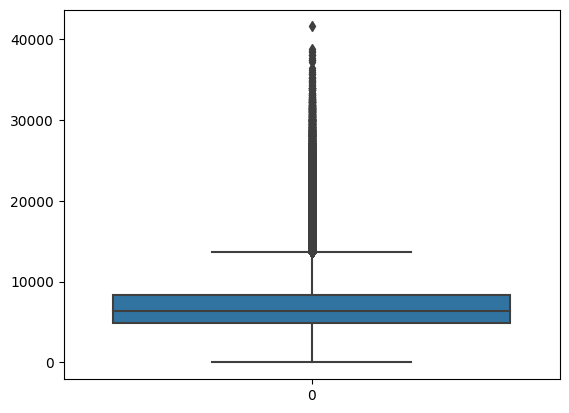

In [43]:
sn.boxplot(merged_df_train['Sales'].values)

In the above graph, we can clearly see that values above 13611.5 are acting as the outliers and must be removed.

In [44]:
# Outlier Detection

# IQR
Q1 = np.percentile(merged_df_train['Sales'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(merged_df_train['Sales'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", merged_df_train.shape)

# Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(merged_df_train['Sales']>=upper)

# Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(merged_df_train['Sales']<=lower)

# Removing the outliers
dfu = merged_df_train.loc[upper_array,:]
dfl = merged_df_train.loc[lower_array,:]


frames = [dfu, dfl]
merged_df_train = pd.concat(frames)

print("New Shape: ", merged_df_train.shape)

Old Shape:  (844392, 25)
New Shape:  (30769, 25)


In [45]:
upper

13611.5

## 3-4 - Select Inputs and Targets

In [46]:
merged_df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [47]:
inputs_columns = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
                  'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
                  'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
                  'Promo2Open', 'IsPromo2Month']
target_column = 'Sales'

In [48]:
# train inputs df
inputs_tr = merged_df_train[inputs_columns].copy()
# train targets df
targets_tr = merged_df_train[target_column].copy()

In [49]:
print(f"Inputs_Size = {inputs_tr.shape}")
print(f"Targets_Size = {targets_tr.shape}")

Inputs_Size = (30769, 16)
Targets_Size = (30769,)


In [50]:
inputs_tr

Store  DayOfWeek  Promo StateHoliday  SchoolHoliday StoreType  \
467        262          2      0            a              1         b   
1143       380          3      0            0              1         a   
1147       383          3      0            0              1         a   
1227       336          3      0            0              1         a   
1240       320          3      0            0              1         a   
...        ...        ...    ...          ...            ...       ...   
1017142    729          5      1            0              1         c   
1017145    726          5      1            0              1         a   
1017172    707          5      1            0              1         a   
1017185    756          5      1            0              1         a   
1017199    733          5      1            0              1         b   

        Assortment  CompetitionDistance  CompetitionOpen  Day  Month  Year  \
467              a               1180.0              0.0    1      1  2013   
1143             a               2240.0              0.0    2      1  2013   
1147             c                350.0              0.0    2      1  2013   
1227             a                190.0              0.0    2      1  2013   
1240             c                210.0              4.0    2      1  2013   
...            ...                  ...              ...  ...    ...   ...   
1017142          c               8980.0             49.0   31      7  2015   
1017145          c              40540.0            161.0   31      7  2015   
1017172          c               2900.0            300.0   31      7  2015   
1017185          c                 50.0              0.0   31      7  2015   
1017199          b                860.0            189.0   31      7  2015   

         WeekOfYear  Promo2  Promo2Open  IsPromo2Month  
467               1       0    0.000000              0  
1143              1       1    0.000000              0  
1147              1       0    0.000000              0  
1227              1       0    0.000000              0  
1240              1       0    0.000000              0  
...             ...     ...         ...            ...  
1017142          31       0    0.000000              0  
1017145          31       0    0.000000              0  
1017172          31       0    0.000000              0  
1017185          31       1   45.934426              1  
1017199          31       0    0.000000              0  

[30769 rows x 16 columns]

In [51]:
targets_tr

467        17267
1143       15658
1147       16225
1227       13817
1240       14984
           ...  
1017142    14730
1017145    13962
1017172    13989
1017185    25280
1017199    16625
Name: Sales, Length: 30769, dtype: int64

In [52]:
# test inputs df
inputs_ts = merged_df_test[inputs_columns].copy()

In [53]:
inputs_ts

Store  DayOfWeek  Promo StateHoliday  SchoolHoliday StoreType  \
0          1          4      1            0              0         c   
1          3          4      1            0              0         a   
2          7          4      1            0              0         a   
3          8          4      1            0              0         a   
4          9          4      1            0              0         a   
...      ...        ...    ...          ...            ...       ...   
41083   1111          6      0            0              0         a   
41084   1112          6      0            0              0         c   
41085   1113          6      0            0              0         a   
41086   1114          6      0            0              0         a   
41087   1115          6      0            0              1         d   

      Assortment  CompetitionDistance  CompetitionOpen  Day  Month  Year  \
0              a               1270.0             84.0   17      9  2015   
1              a              14130.0            105.0   17      9  2015   
2              c              24000.0             29.0   17      9  2015   
3              a               7520.0             11.0   17      9  2015   
4              c               2030.0            181.0   17      9  2015   
...          ...                  ...              ...  ...    ...   ...   
41083          a               1900.0             14.0    1      8  2015   
41084          c               1880.0            112.0    1      8  2015   
41085          c               9260.0              0.0    1      8  2015   
41086          c                870.0              0.0    1      8  2015   
41087          c               5350.0              0.0    1      8  2015   

       WeekOfYear  Promo2  Promo2Open  IsPromo2Month  
0              38       0    0.000000              0  
1              38       1   53.508197              0  
2              38       0    0.000000              0  
3              38       0    0.000000              0  
4              38       0    0.000000              0  
...           ...     ...         ...            ...  
41083          31       1   24.000000              0  
41084          31       0    0.000000              0  
41085          31       0    0.000000              0  
41086          31       0    0.000000              0  
41087          31       1   38.065574              0  

[41088 rows x 16 columns]

## 3-5 Transform categorical columns values into integer values

In [54]:
inputs_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30769 entries, 467 to 1017199
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                30769 non-null  int64  
 1   DayOfWeek            30769 non-null  int64  
 2   Promo                30769 non-null  int64  
 3   StateHoliday         30769 non-null  object 
 4   SchoolHoliday        30769 non-null  int64  
 5   StoreType            30769 non-null  object 
 6   Assortment           30769 non-null  object 
 7   CompetitionDistance  30769 non-null  float64
 8   CompetitionOpen      30769 non-null  float64
 9   Day                  30769 non-null  int64  
 10  Month                30769 non-null  int64  
 11  Year                 30769 non-null  int64  
 12  WeekOfYear           30769 non-null  int64  
 13  Promo2               30769 non-null  int64  
 14  Promo2Open           30769 non-null  float64
 15  IsPromo2Month        30769 non-n

In [55]:
inputs_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                41088 non-null  int64  
 1   DayOfWeek            41088 non-null  int64  
 2   Promo                41088 non-null  int64  
 3   StateHoliday         41088 non-null  object 
 4   SchoolHoliday        41088 non-null  int64  
 5   StoreType            41088 non-null  object 
 6   Assortment           41088 non-null  object 
 7   CompetitionDistance  41088 non-null  float64
 8   CompetitionOpen      41088 non-null  float64
 9   Day                  41088 non-null  int64  
 10  Month                41088 non-null  int64  
 11  Year                 41088 non-null  int64  
 12  WeekOfYear           41088 non-null  int64  
 13  Promo2               41088 non-null  int64  
 14  Promo2Open           41088 non-null  float64
 15  IsPromo2Month        41088 non-null 

In [56]:
inputs_tr["StateHoliday"] = inputs_tr["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
inputs_ts["StateHoliday"] = inputs_ts["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [57]:
df_cat = inputs_tr.select_dtypes(include=['object'])

In [58]:
df_cat

StoreType Assortment
467             b          a
1143            a          a
1147            a          c
1227            a          a
1240            a          c
...           ...        ...
1017142         c          c
1017145         a          c
1017172         a          c
1017185         a          c
1017199         b          b

[30769 rows x 2 columns]

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [60]:
cat_cols = inputs_tr.select_dtypes(include=['object']).columns

In [61]:
inputs_tr[cat_cols] = inputs_tr[cat_cols].apply(lambda x: label_encoder.fit_transform(x))
inputs_ts[cat_cols] = inputs_ts[cat_cols].apply(lambda x: label_encoder.fit_transform(x))

In [62]:
inputs_tr['WeekOfYear'] = pd.to_numeric(inputs_tr['WeekOfYear'])
inputs_ts['WeekOfYear'] = pd.to_numeric(inputs_ts['WeekOfYear'])

In [63]:
inputs_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30769 entries, 467 to 1017199
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                30769 non-null  int64  
 1   DayOfWeek            30769 non-null  int64  
 2   Promo                30769 non-null  int64  
 3   StateHoliday         30769 non-null  int64  
 4   SchoolHoliday        30769 non-null  int64  
 5   StoreType            30769 non-null  int64  
 6   Assortment           30769 non-null  int64  
 7   CompetitionDistance  30769 non-null  float64
 8   CompetitionOpen      30769 non-null  float64
 9   Day                  30769 non-null  int64  
 10  Month                30769 non-null  int64  
 11  Year                 30769 non-null  int64  
 12  WeekOfYear           30769 non-null  int64  
 13  Promo2               30769 non-null  int64  
 14  Promo2Open           30769 non-null  float64
 15  IsPromo2Month        30769 non-n

## 3-6 Normalize / Standardize the Dataset

In [64]:
inputs_tr.max()

Store                   1114.000000
DayOfWeek                  7.000000
Promo                      1.000000
StateHoliday               1.000000
SchoolHoliday              1.000000
StoreType                  3.000000
Assortment                 2.000000
CompetitionDistance    75860.000000
CompetitionOpen         1372.000000
Day                       31.000000
Month                     12.000000
Year                    2015.000000
WeekOfYear                52.000000
Promo2                     1.000000
Promo2Open                71.081967
IsPromo2Month              1.000000
dtype: float64

In [65]:
numeric_cols = ['CompetitionDistance', 'CompetitionOpen']

In [66]:
def Scaler_Function(Inputs, Normalize, Standardize):
  # Normalize   = 1
  # Standardize = 0

  if Normalize == 1:
      print('\nNormalize is selected')

      scaler1 = MinMaxScaler(feature_range=(0, 1))
      InputsN = scaler1.fit_transform(Inputs)
      Inputs = pd.DataFrame(InputsN)


  elif Standardize ==1:
      print('\nStandardize is selected')
      scaler1 = StandardScaler()
      InputsN = scaler1.fit_transform(Inputs)
      Inputs = pd.DataFrame(InputsN)


  else:
      pass
      print('\nOriginal Data is selected')

  return Inputs

In [67]:
inputs_tr[numeric_cols] = Scaler_Function(inputs_tr[numeric_cols], Normalize=0, Standardize=0)


Original Data is selected


In [68]:
inputs_ts[numeric_cols] = Scaler_Function(inputs_ts[numeric_cols], Normalize=0, Standardize=0)


Original Data is selected


In [69]:
inputs_tr.shape

(30769, 16)

## 3-7 Select Train & Test Data-sets

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(inputs_tr, targets_tr, shuffle=False, random_state=21, test_size=0.2)

In [71]:
Algorithm = ['XGB','RF','DT','LR']
metrics_name = ['Rsq_TR','RMSE_TR','MAPE_TR','MAE_TR','Rsq_TS','RMSE_TS','MAPE_TS','MAE_TS']
result_array = np.zeros((len(Algorithm),len(metrics_name)+1))
columns_name = metrics_name
columns_name.insert(0,"Algorithm")
res_metrics_all = pd.DataFrame(result_array,columns=columns_name)
res_metrics_all["Algorithm"]=Algorithm
res_metrics_all

Algorithm  Rsq_TR  RMSE_TR  MAPE_TR  MAE_TR  Rsq_TS  RMSE_TS  MAPE_TS  \
0       XGB     0.0      0.0      0.0     0.0     0.0      0.0      0.0   
1        RF     0.0      0.0      0.0     0.0     0.0      0.0      0.0   
2        DT     0.0      0.0      0.0     0.0     0.0      0.0      0.0   
3        LR     0.0      0.0      0.0     0.0     0.0      0.0      0.0   

   MAE_TS  
0     0.0  
1     0.0  
2     0.0  
3     0.0

## 4 XGBoost

In [72]:
from xgboost import XGBRegressor

## 4-1 Grid Search for Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [75]:
param_grid = {"n_estimators" : [50, 100, 200],
              # "booster": ["gbtree", "gblinear", "dart"],
              "learning_rate": [0.01, 0.05, 0.1],
              "max_depth": [3, 6, 10],
              # "subsample": [1, 5, 15],
              # "gamma": [0.1, 0.5, 2],
              # "colsample_bytree": [0.3, 0.5, 0.7]
              }

In [76]:
XGB_R = XGBRegressor()

In [77]:
# Run Grid Search
%%time
grid_search_XGB_R = GridSearchCV(XGB_R, param_grid=param_grid, cv=5, scoring ='neg_mean_absolute_error', n_jobs=-1)

Grid_Results = grid_search_XGB_R.fit(xtrain,ytrain)

# Get Best Parameters of the Model
Best_Params = Grid_Results.best_params_
Best_Params

CPU times: user 11.6 s, sys: 424 ms, total: 12 s
Wall time: 5min 19s


{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [79]:
# Construct Main ML Model based on obtained Best Parameters
Best_XGB_R = XGBRegressor(
                          objective ='reg:squarederror',
                          n_estimators = Best_Params["n_estimators"],
                          # booster = Best_Params["booster"],
                          learning_rate = Best_Params["learning_rate"],
                          max_depth = Best_Params["max_depth"],
                          # subsample = Best_Params["subsample"],
                          # gamma = Best_Params["gamma"],
                          # colsample_bytree = Best_Params["colsample_bytree"]
                          )

## 4-2 KFold Cross Validation

In [82]:
kf = KFold(n_splits=5, random_state=10, shuffle=True)

## 4-3 Train XGBoost Model and Apply KFold Cross Validation

In [83]:
%%time
RMSE_TR = []
RMSE_TS = []
Xgboost = []

for train_index, test_index in kf.split(xtrain):
    i = 0
    
    X_tr, X_ts = xtrain.iloc[train_index,:], xtrain.iloc[test_index,:]
    y_tr, y_ts = ytrain.iloc[train_index], ytrain.iloc[test_index]  
    
    Best_XGB_R.fit(X_tr, y_tr)
    
    y_tr_prd = Best_XGB_R.predict(X_tr)
    y_ts_prd = Best_XGB_R.predict(X_ts)
       
    RMSE_tr   = np.sqrt(metrics.mean_squared_error(y_tr, y_tr_prd))
    RMSE_ts   = np.sqrt(metrics.mean_squared_error(y_ts, y_ts_prd))
    
    i += 1
    
    RMSE_TR.append(RMSE_tr)
    RMSE_TS.append(RMSE_ts)
    Xgboost.append(Best_XGB_R)

CPU times: user 33.4 s, sys: 422 ms, total: 33.9 s
Wall time: 18.7 s


In [84]:
RMSE_TR

[803.4002559839378,
 814.1505833988568,
 817.9187595457099,
 789.3974922404627,
 838.5630243633764]

In [85]:
RMSE_TS

[1441.4660714438708,
 1507.9483819720672,
 1561.8748450971023,
 1485.2766483024022,
 1440.4450082259852]

In [86]:
Idx = RMSE_TS.index(min(RMSE_TS))
Idx

4

In [87]:
XGBoost_Model = Xgboost[Idx]
XGBoost_Model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## 4-4 Train Results

In [88]:
ytrain_prd = Best_XGB_R.predict(xtrain)

In [89]:
df_Train = pd.DataFrame({'Actual_Train': ytrain, 'Predicted_Train': ytrain_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Train_Targets_Outputs_Results_XGB.xlsx')
df_Train.to_excel(writer, sheet_name='Train_Results')
writer.save()
df_Train

Actual_Train  Predicted_Train
467            17267     17883.996094
1143           15658     15666.768555
1147           16225     16653.673828
1227           13817     15111.369141
1240           14984     14626.903320
...              ...              ...
816892         17019     16579.525391
816902         14089     14006.221680
816917         14220     14277.512695
816935         18470     18872.396484
816945         17257     17952.406250

[24615 rows x 2 columns]

In [90]:
################################### Calculate Train Results ###################################
R2_train   = np.round(metrics.r2_score(ytrain, ytrain_prd),2)
RMSE_train = np.round(np.sqrt(metrics.mean_squared_error(ytrain, ytrain_prd)),2)
MAPE_train = np.round(metrics.mean_absolute_percentage_error(ytrain, ytrain_prd),2)
MAE_train  = np.round(metrics.mean_absolute_error(ytrain, ytrain_prd),2)

##################################### Print Train Results #####################################
print("\n"+"*"*25+" Train Results XGB "+"*"*25)
print(f"R2_Train = {R2_train}")
print(f"RMSE_Train = {RMSE_train}")
print(f"MAPE_Train = {MAPE_train}")
print(f"MAE_Train = {MAE_train}")

############################## Export Train Results to Text File ##############################
print("*"*25+" Train Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results XGB.txt', 'w'))
print(f"R2_Train   = {R2_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results XGB.txt', 'a'))
print(f"RMSE_Train = {RMSE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results XGB.txt', 'a'))
print(f"MAPE_Train = {MAPE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results XGB.txt', 'a'))
print(f"MAE_Train  = {MAE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results XGB.txt', 'a'))


************************* Train Results XGB *************************
R2_Train = 0.9
RMSE_Train = 988.7
MAPE_Train = 0.04
MAE_Train = 695.35


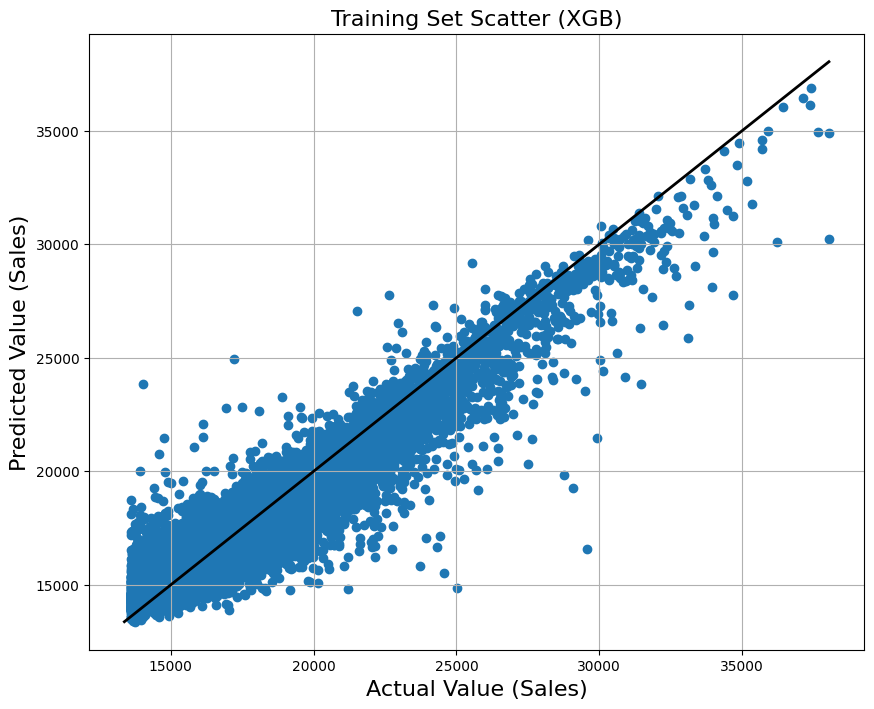

In [91]:
##################################### Train Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytrain, ytrain_prd)
MIN = min(float(ytrain.min()),float(ytrain_prd.min()))
MAX = max(float(ytrain.max()),float(ytrain_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Training Set Scatter (XGB)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Scatter_XGB',dpi=100);

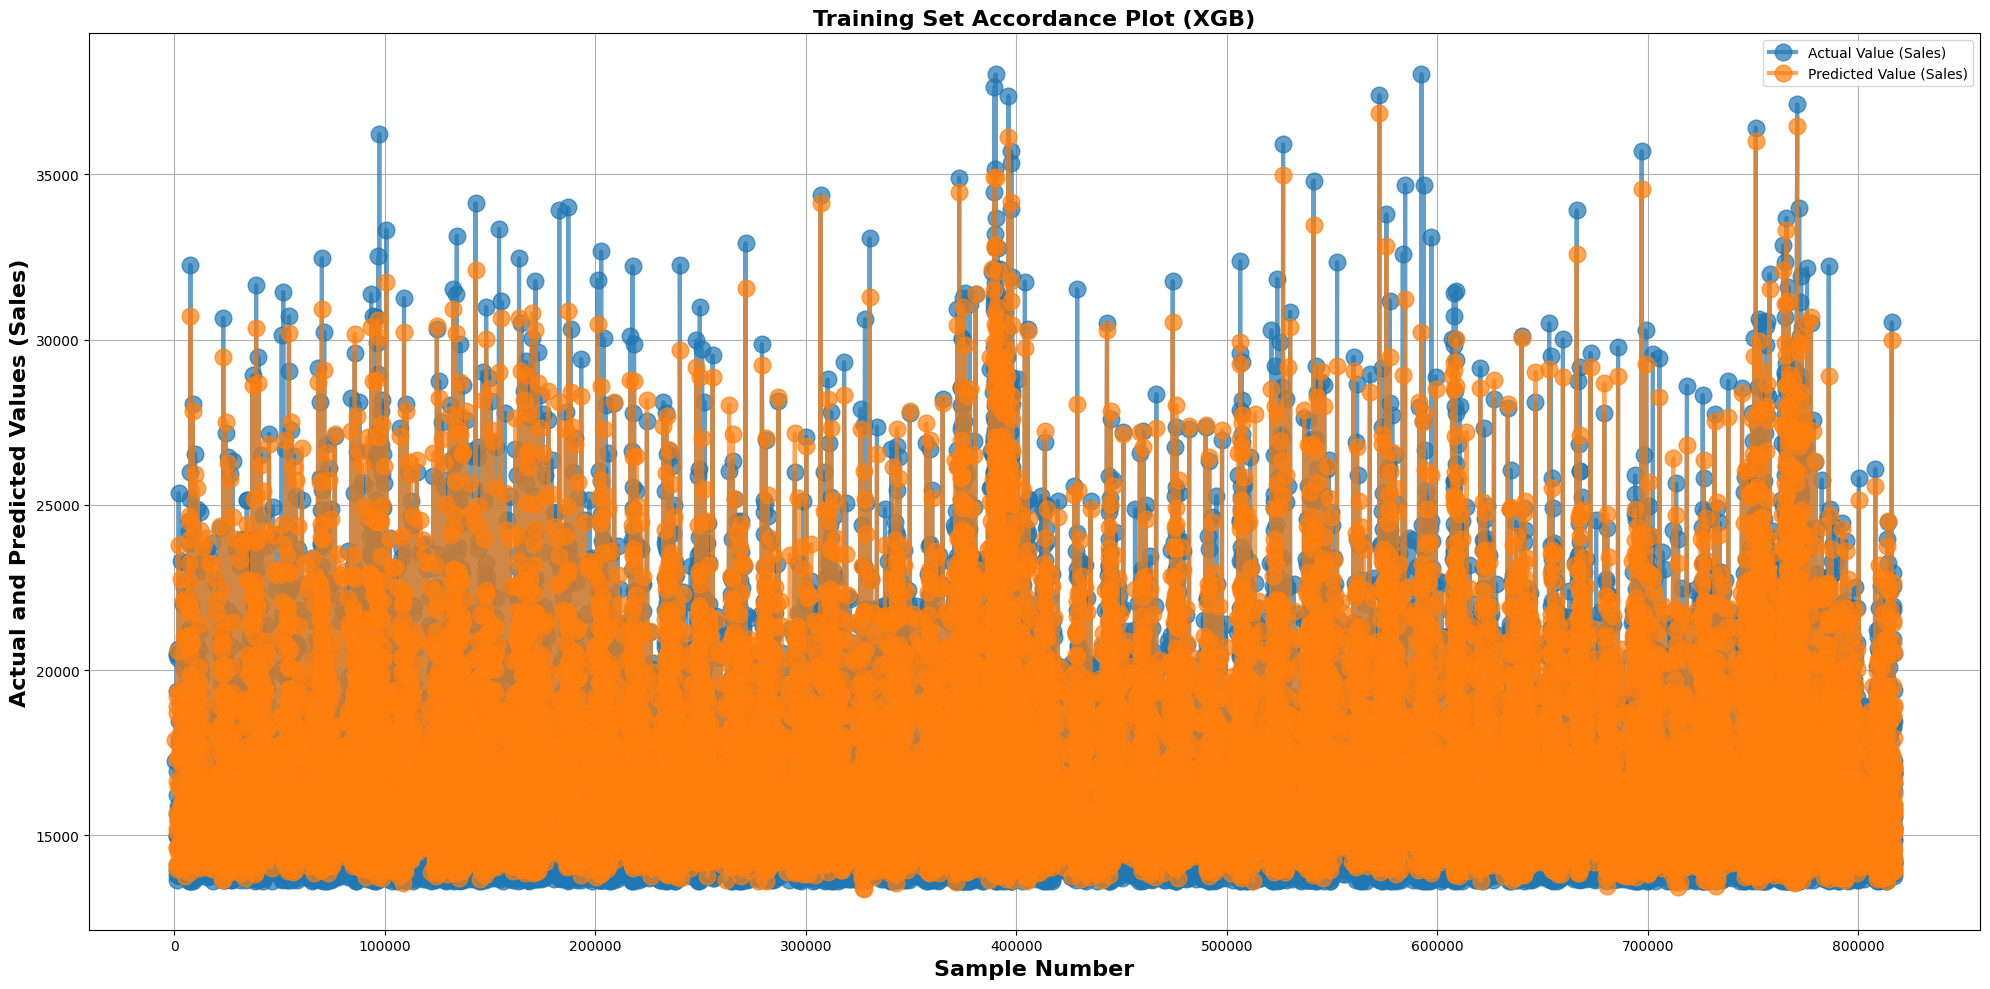

In [92]:
##################################### Train Accordance Plot #####################################
dfTR = df_Train
plt.figure(figsize=(20,10))
plt.plot(dfTR['Actual_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTR['Predicted_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Training Set Accordance Plot (XGB)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Accordance_Plot_XGB',dpi=100);
plt.show();

## 4-5 Test Results

In [93]:
ytest_prd = Best_XGB_R.predict(xtest)

In [94]:
df_Test = pd.DataFrame({'Actual_Test': ytest, 'Predicted_Test': ytest_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Test_Targets_Outputs_Results_XGB.xlsx')
df_Test.to_excel(writer, sheet_name='Test_Results')
writer.save()
df_Test

Actual_Test  Predicted_Test
816968         14352    14944.151367
816970         14622    17347.244141
816977         21338    20978.242188
816978         19110    20084.789062
816985         25589    23763.759766
...              ...             ...
1017142        14730    14913.676758
1017145        13962    14316.096680
1017172        13989    13772.220703
1017185        25280    20939.056641
1017199        16625    16419.759766

[6154 rows x 2 columns]

In [95]:
################################### Calculate Test Results ###################################
R2_test   = np.round(metrics.r2_score(ytest, ytest_prd),2)
RMSE_test = np.round(np.sqrt(metrics.mean_squared_error(ytest, ytest_prd)),2)
MAPE_test = np.round(metrics.mean_absolute_percentage_error(ytest, ytest_prd),2)
MAE_test  = np.round(metrics.mean_absolute_error(ytest, ytest_prd),2)

##################################### Print Test Results #####################################
print("\n"+"*"*25+" Test Results XGB "+"*"*25)
print(f"R2_Test   = {R2_test}")
print(f"RMSE_Test = {RMSE_test}")
print(f"MAPE_Test = {MAPE_test}")
print(f"MAE_Test  = {MAE_test}")

############################## Export Test Results to Text File ##############################
print("*"*25+" Test Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results XGB.txt', 'w'))
print(f"R2_Test   = {R2_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results XGB.txt', 'a'))
print(f"RMSE_Test = {RMSE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results XGB.txt', 'a'))
print(f"MAPE_Test = {MAPE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results XGB.txt', 'a'))
print(f"MAE_Test  = {MAE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results XGB.txt', 'a'))


************************* Test Results XGB *************************
R2_Test   = 0.64
RMSE_Test = 1813.55
MAPE_Test = 0.07
MAE_Test  = 1241.69


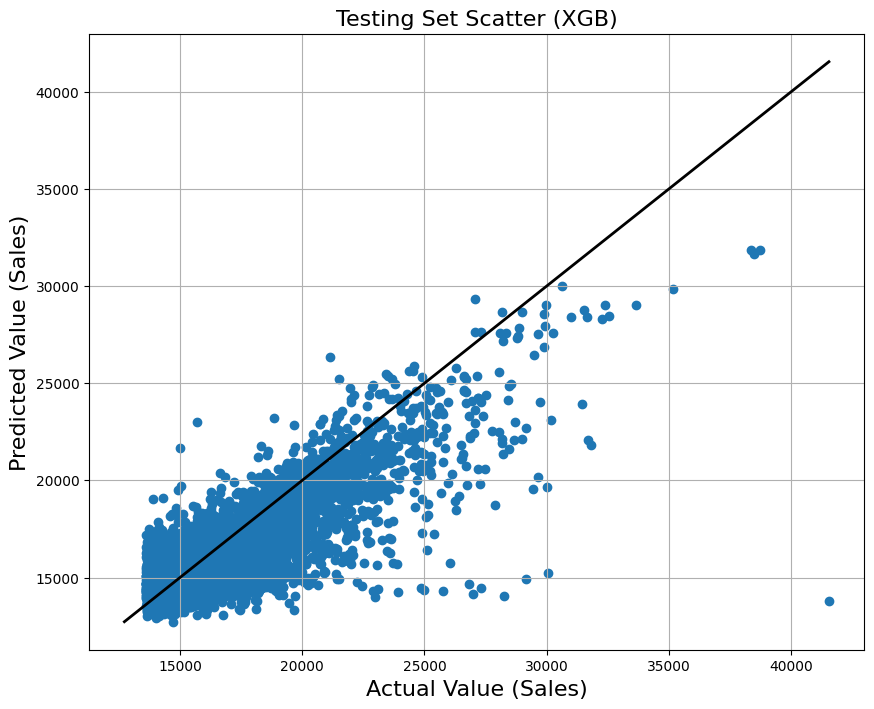

In [96]:
##################################### Test Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytest, ytest_prd)
MIN = min(float(ytest.min()),float(ytest_prd.min()))
MAX = max(float(ytest.max()),float(ytest_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Testing Set Scatter (XGB)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Scatter_XGB',dpi=100);

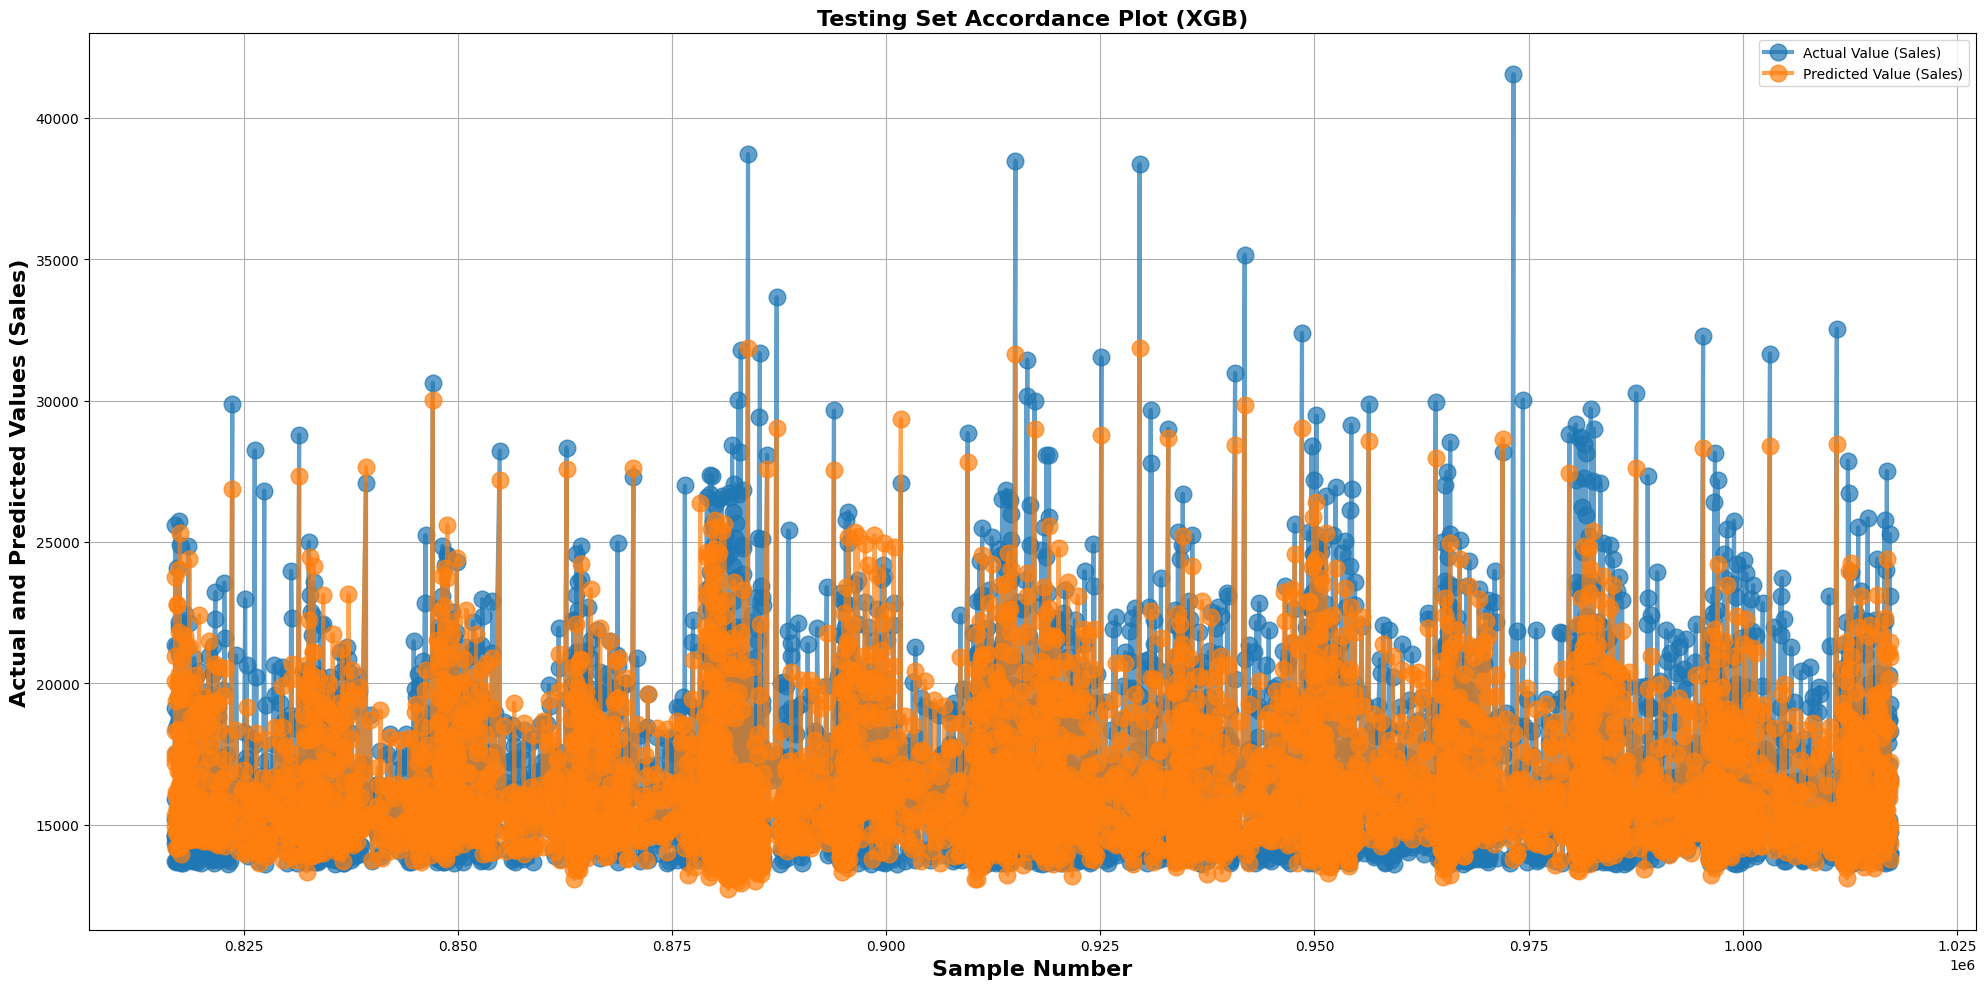

In [97]:
##################################### Test Accordance Plot #####################################
dfTS = df_Test
plt.figure(figsize=(20,10))
plt.plot(dfTS['Actual_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTS['Predicted_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Testing Set Accordance Plot (XGB)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Accordance_Plot_XGB',dpi=100);
plt.show();

In [98]:
k = 0
result_array[k,1] = R2_train
result_array[k,2] = RMSE_train
result_array[k,3] = MAPE_train
result_array[k,4] = MAE_train
result_array[k,5] = R2_test
result_array[k,6] = RMSE_test
result_array[k,7] = MAPE_test
result_array[k,7] = MAE_test

Feature importance

In [99]:
feature_importance_df = pd.DataFrame({
                                    'feature': xtrain.columns,
                                    'importance': Best_XGB_R.feature_importances_
}).sort_values('importance', ascending=False)

In [100]:
feature_importance_df
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/feature_importance_XGB.csv")

feature  importance
3          StateHoliday    0.190488
7   CompetitionDistance    0.130651
13               Promo2    0.124773
2                 Promo    0.113807
0                 Store    0.065353
1             DayOfWeek    0.057470
12           WeekOfYear    0.054857
6            Assortment    0.049225
5             StoreType    0.045645
8       CompetitionOpen    0.035228
10                Month    0.031048
14           Promo2Open    0.026212
11                 Year    0.020143
9                   Day    0.020114
4         SchoolHoliday    0.017974
15        IsPromo2Month    0.017011

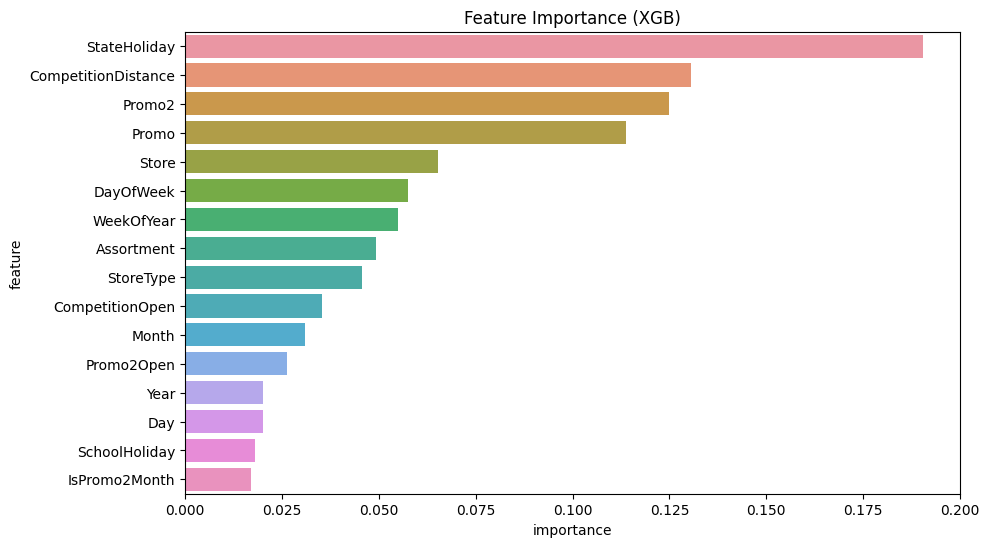

In [101]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance (XGB)')
sn.barplot(data=feature_importance_df, x='importance', y='feature');
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Feature_importance_Plot_XGB',dpi=100);

predict the sales for test file

In [102]:
ytest_final = Best_XGB_R.predict(inputs_ts)
ytest_final.astype(int)

array([14433, 13526, 13585, ..., 13961, 20374, 15221])

In [105]:
df_test['Sales']  = ytest_final
pd.DataFrame(df_test).to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_test_with_Sales_XGB.csv")

## 5 - Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [108]:
# define the grid search parameters
n_estimators = [50, 100, 200]
max_features = [1, 5, 10]
max_depth = [1, 10, 20]
min_samples_split = [2, 5, 7]

param_grid = dict(
                  n_estimators = n_estimators,
                  max_features = max_features,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split
                  )

## 5-1 GridSearchCV

In [109]:
%%time
RF_R = RandomForestRegressor()

# Run Grid Search
grid_search_RF_R = GridSearchCV(RF_R, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

Grid_Results = grid_search_RF_R.fit(xtrain,ytrain)

# Get Best Parameters of the Model
Best_Params = Grid_Results.best_params_
Best_Params

CPU times: user 15.2 s, sys: 769 ms, total: 16 s
Wall time: 10min 26s


{'max_depth': 20,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [110]:
# Construct Main ML Model based on obtained Best Parameters
Best_RF_R = RandomForestRegressor(
                                  n_estimators = Best_Params["n_estimators"],
                                  max_features = Best_Params["max_features"],
                                  max_depth = Best_Params["max_depth"],
                                  min_samples_split = Best_Params["min_samples_split"],
                                  )

## 5-2- Train RandomFoest Model and Apply KFold Cross Validation

In [111]:
%%time
RMSE_TR = []
RMSE_TS = []
RandomForest = []

for train_index, test_index in kf.split(xtrain):
    i = 0
    
    X_tr, X_ts = xtrain.iloc[train_index,:], xtrain.iloc[test_index,:]
    y_tr, y_ts = ytrain.iloc[train_index], ytrain.iloc[test_index]  
    
    Best_RF_R.fit(X_tr, y_tr)
    
    y_tr_prd = Best_RF_R.predict(X_tr)
    y_ts_prd = Best_RF_R.predict(X_ts)
       
    RMSE_tr   = np.sqrt(metrics.mean_squared_error(y_tr, y_tr_prd))
    RMSE_ts   = np.sqrt(metrics.mean_squared_error(y_ts, y_ts_prd))
    
    i += 1
    
    RMSE_TR.append(RMSE_tr)
    RMSE_TS.append(RMSE_ts)
    RandomForest.append(Best_RF_R)

CPU times: user 55.9 s, sys: 229 ms, total: 56.2 s
Wall time: 56.9 s


In [112]:
RMSE_TR

[658.0449830032713,
 650.7056628567,
 657.9652190121005,
 654.0875412877092,
 657.3134728274588]

In [113]:
RMSE_TS

[1540.6931365038704,
 1616.4184162438196,
 1640.7858764616726,
 1583.8999830642244,
 1533.3601517823229]

In [114]:
Idx = RMSE_TS.index(min(RMSE_TS))
Idx

4

In [115]:
RandomForest_Model = RandomForest[Idx]
RandomForest_Model

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=200)

## 5-3 Train Results

In [116]:
ytrain_prd = RandomForest_Model.predict(xtrain)

In [117]:
df_Train = pd.DataFrame({'Actual_Train': ytrain, 'Predicted_Train': ytrain_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Train_Targets_Outputs_Results_RF.xlsx')
df_Train.to_excel(writer, sheet_name='Train_Results')
writer.save()
df_Train

Actual_Train  Predicted_Train
467            17267     20391.765000
1143           15658     16037.191122
1147           16225     17784.108082
1227           13817     14469.444470
1240           14984     14759.278033
...              ...              ...
816892         17019     16813.331667
816902         14089     14501.359167
816917         14220     14662.542681
816935         18470     18962.138480
816945         17257     17607.965904

[24615 rows x 2 columns]

In [118]:
################################### Calculate Train Results ###################################
R2_train   = np.round(metrics.r2_score(ytrain, ytrain_prd),2)
RMSE_train = np.round(np.sqrt(metrics.mean_squared_error(ytrain, ytrain_prd)),2)
MAPE_train = np.round(metrics.mean_absolute_percentage_error(ytrain, ytrain_prd),2)
MAE_train  = np.round(metrics.mean_absolute_error(ytrain, ytrain_prd),2)

##################################### Print Train Results #####################################
print("\n"+"*"*25+" Train Results RF "+"*"*25)
print(f"R2_Train = {R2_train}")
print(f"RMSE_Train = {RMSE_train}")
print(f"MAPE_Train = {MAPE_train}")
print(f"MAE_Train = {MAE_train}")

############################## Export Train Results to Text File ##############################
print("*"*25+" Train Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results RF.txt', 'w'))
print(f"R2_Train   = {R2_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results RF.txt', 'a'))
print(f"RMSE_Train = {RMSE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results RF.txt', 'a'))
print(f"MAPE_Train = {MAPE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results RF.txt', 'a'))
print(f"MAE_Train  = {MAE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results RF.txt', 'a'))


************************* Train Results RF *************************
R2_Train = 0.92
RMSE_Train = 903.26
MAPE_Train = 0.04
MAE_Train = 608.3


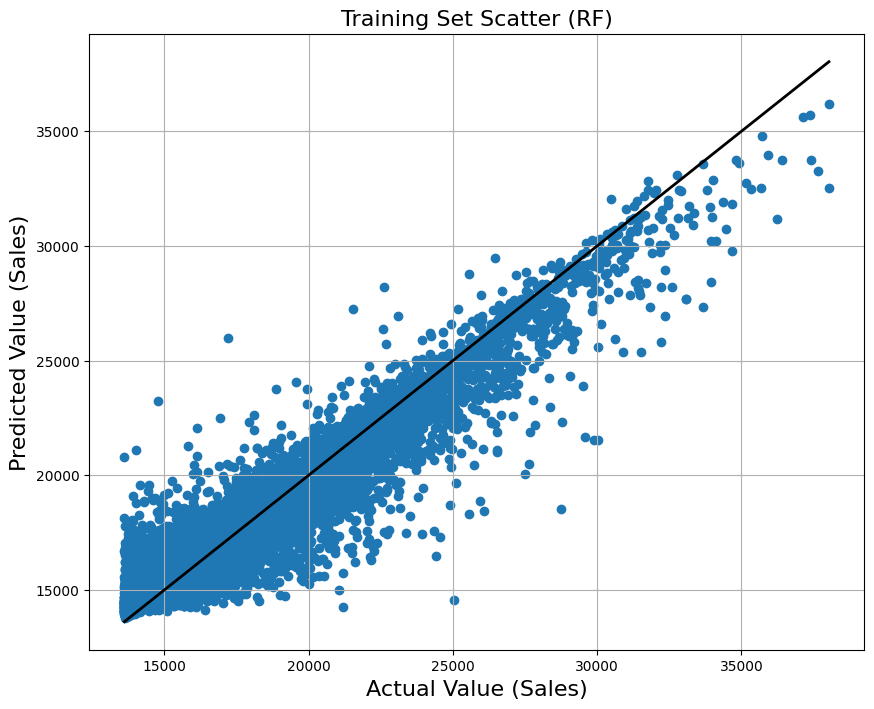

In [119]:
##################################### Train Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytrain, ytrain_prd)
MIN = min(float(ytrain.min()),float(ytrain_prd.min()))
MAX = max(float(ytrain.max()),float(ytrain_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Training Set Scatter (RF)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Scatter_RF',dpi=100);

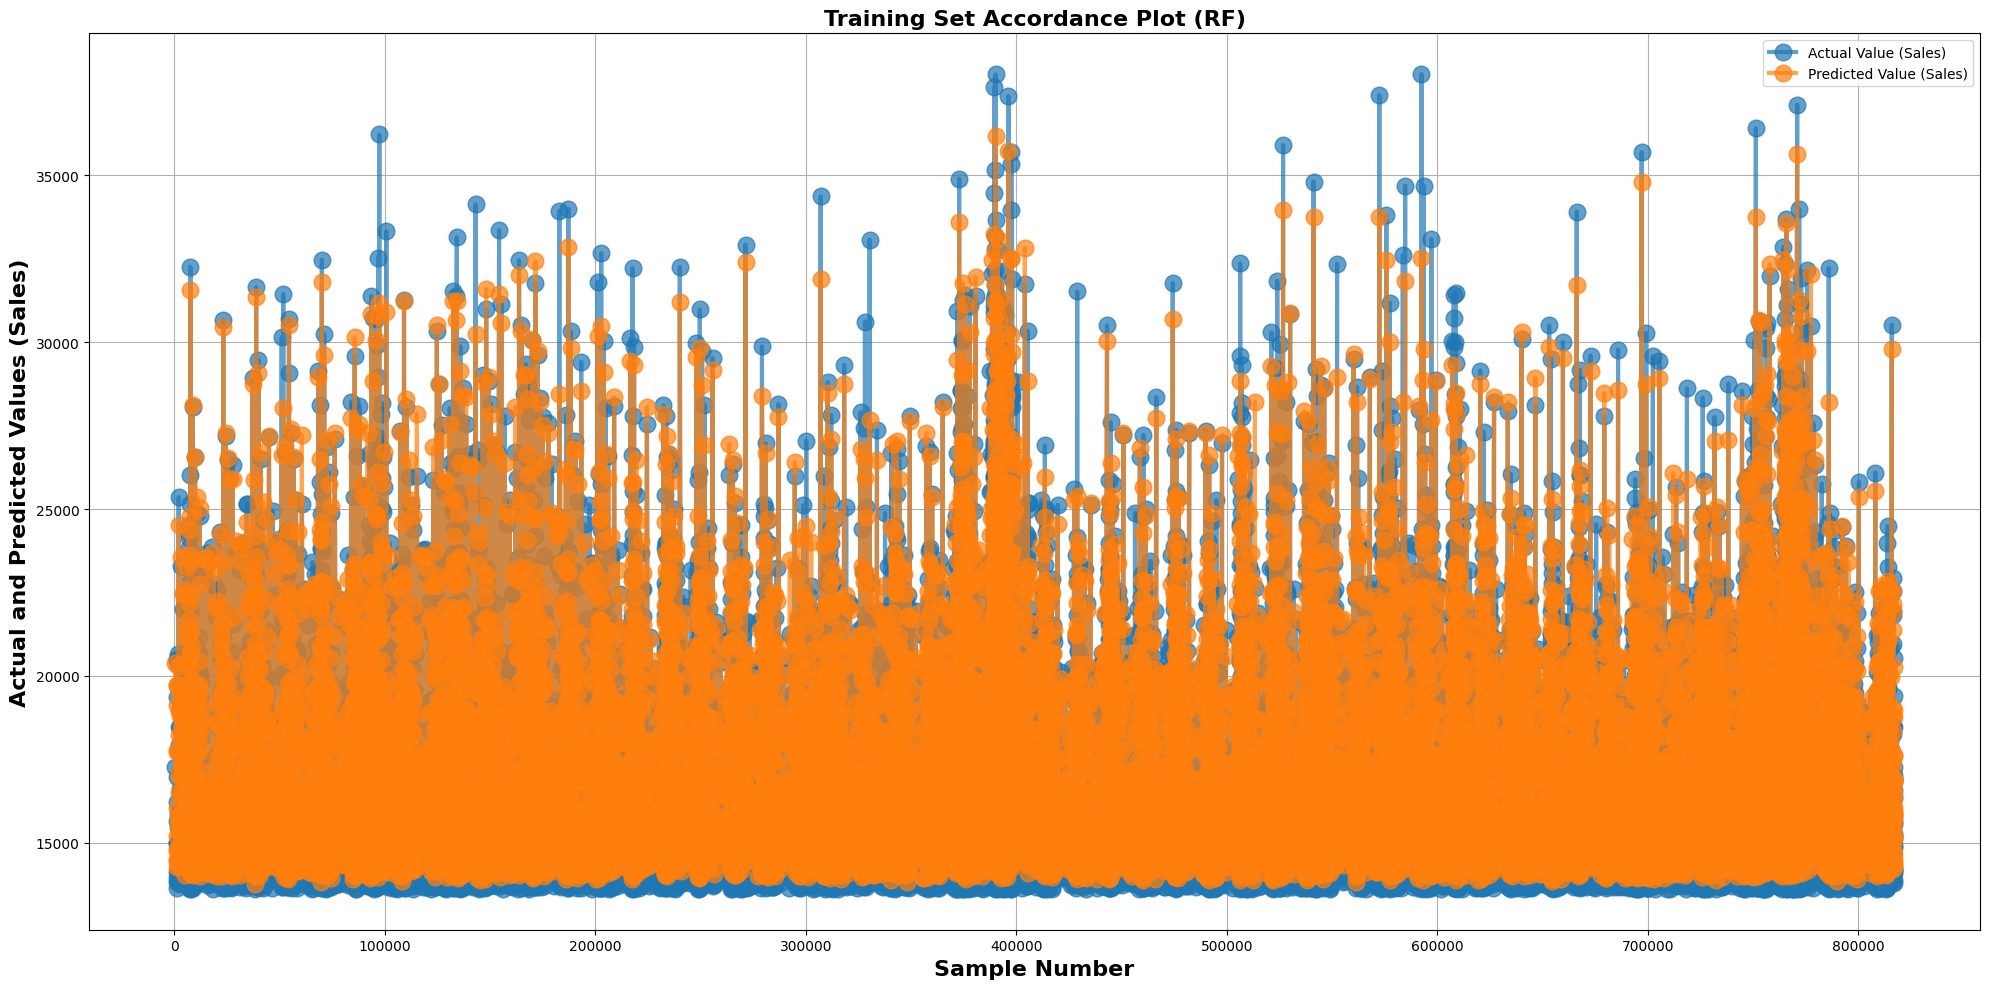

In [120]:
##################################### Train Accordance Plot #####################################
dfTR = df_Train
plt.figure(figsize=(20,10))
plt.plot(dfTR['Actual_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTR['Predicted_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Training Set Accordance Plot (RF)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Accordance_Plot_RF',dpi=100);
plt.show();

## 5-4 Test Results

In [121]:
ytest_prd = RandomForest_Model.predict(xtest)

In [122]:
df_Test = pd.DataFrame({'Actual_Test': ytest, 'Predicted_Test': ytest_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Test_Targets_Outputs_Results_RF.xlsx')
df_Test.to_excel(writer, sheet_name='Test_Results')
writer.save()
df_Test

Actual_Test  Predicted_Test
816968         14352    15235.284503
816970         14622    17832.430951
816977         21338    21200.157147
816978         19110    19903.830000
816985         25589    24563.280745
...              ...             ...
1017142        14730    15164.772523
1017145        13962    15116.256439
1017172        13989    14651.076131
1017185        25280    19928.631621
1017199        16625    16223.418739

[6154 rows x 2 columns]

In [123]:
################################### Calculate Test Results ###################################
R2_test   = np.round(metrics.r2_score(ytest, ytest_prd),2)
RMSE_test = np.round(np.sqrt(metrics.mean_squared_error(ytest, ytest_prd)),2)
MAPE_test = np.round(metrics.mean_absolute_percentage_error(ytest, ytest_prd),2)
MAE_test  = np.round(metrics.mean_absolute_error(ytest, ytest_prd),2)

##################################### Print Test Results #####################################
print("\n"+"*"*25+" Test Results RF "+"*"*25)
print(f"R2_Test   = {R2_test}")
print(f"RMSE_Test = {RMSE_test}")
print(f"MAPE_Test = {MAPE_test}")
print(f"MAE_Test  = {MAE_test}")

############################## Export Test Results to Text File ##############################
print("*"*25+" Test Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results RF.txt', 'w'))
print(f"R2_Test   = {R2_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results RF.txt', 'a'))
print(f"RMSE_Test = {RMSE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results RF.txt', 'a'))
print(f"MAPE_Test = {MAPE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results RF.txt', 'a'))
print(f"MAE_Test  = {MAE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results RF.txt', 'a'))


************************* Test Results RF *************************
R2_Test   = 0.66
RMSE_Test = 1763.21
MAPE_Test = 0.07
MAE_Test  = 1239.63


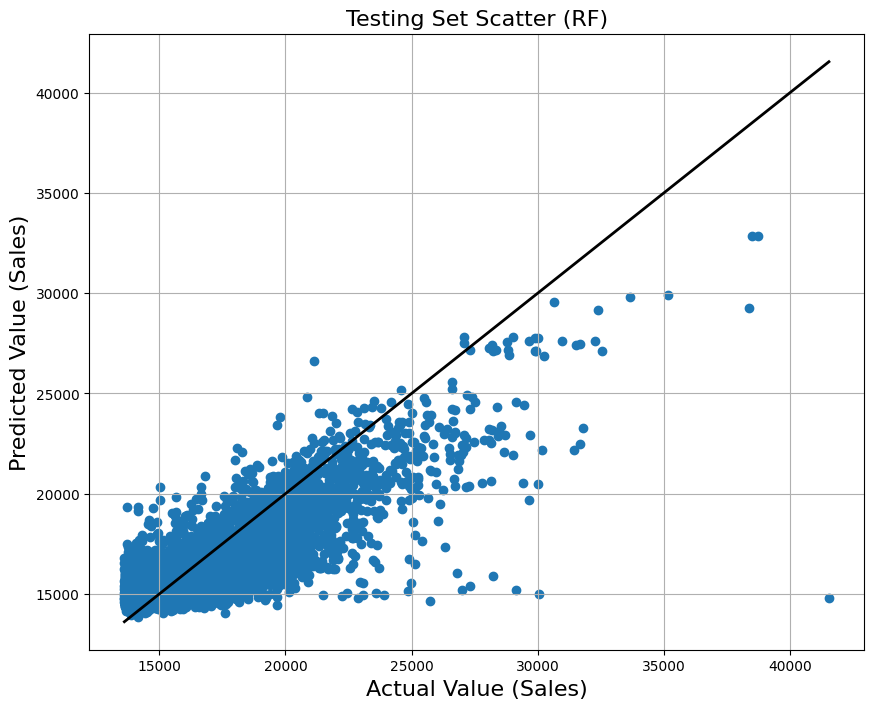

In [124]:
##################################### Test Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytest, ytest_prd)
MIN = min(float(ytest.min()),float(ytest_prd.min()))
MAX = max(float(ytest.max()),float(ytest_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Testing Set Scatter (RF)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Scatter_RF',dpi=100);

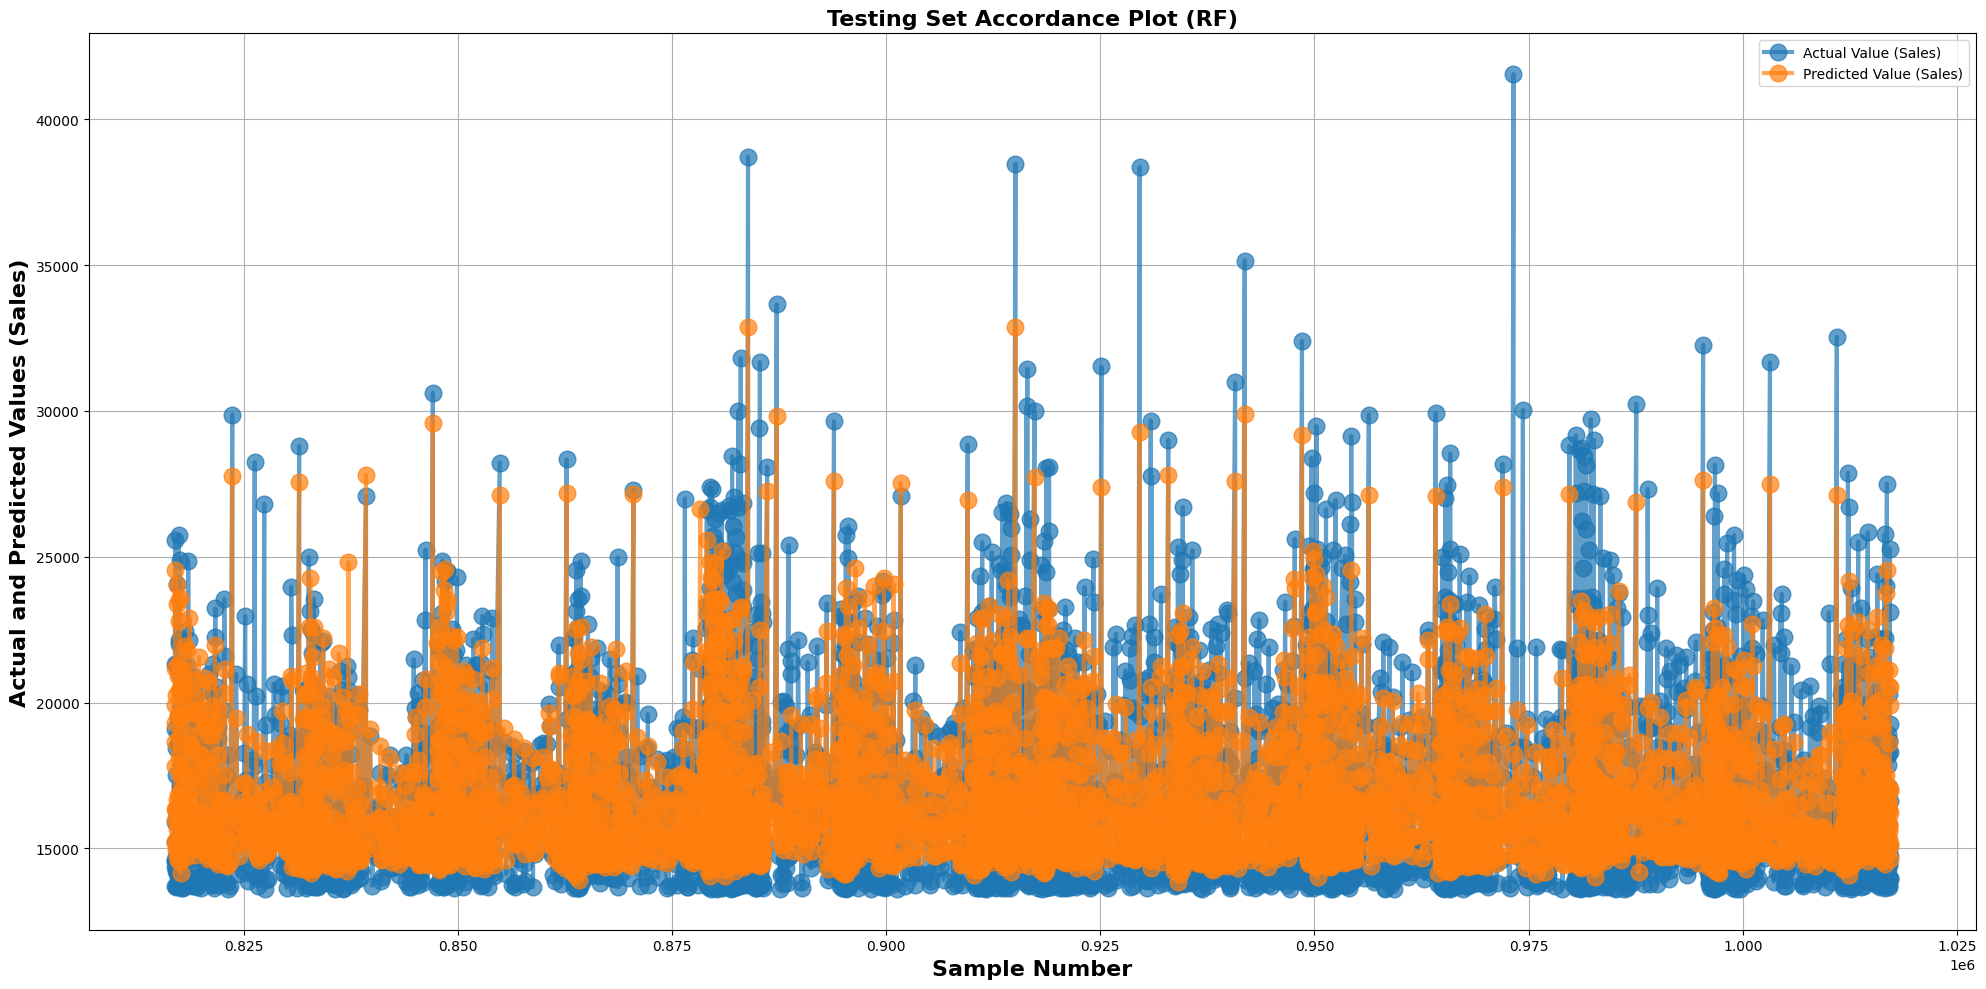

In [125]:
##################################### Test Accordance Plot #####################################
dfTS = df_Test
plt.figure(figsize=(20,10))
plt.plot(dfTS['Actual_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTS['Predicted_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Testing Set Accordance Plot (RF)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Accordance_Plot_RF',dpi=100);
plt.show();

In [126]:
k = 1
result_array[k,1] = R2_train
result_array[k,2] = RMSE_train
result_array[k,3] = MAPE_train
result_array[k,4] = MAE_train
result_array[k,5] = R2_test
result_array[k,6] = RMSE_test
result_array[k,7] = MAPE_test
result_array[k,7] = MAE_test

Feature importance

In [127]:
feature_importance_df = pd.DataFrame({
                                    'feature': xtrain.columns,
                                    'importance': Best_RF_R.feature_importances_
}).sort_values('importance', ascending=False)

In [128]:
feature_importance_df
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/feature_importance_RF.csv")

feature  importance
7   CompetitionDistance    0.214263
0                 Store    0.165233
1             DayOfWeek    0.120550
9                   Day    0.093698
8       CompetitionOpen    0.087846
12           WeekOfYear    0.083553
2                 Promo    0.062503
10                Month    0.043416
14           Promo2Open    0.028314
5             StoreType    0.025721
6            Assortment    0.019223
13               Promo2    0.018330
11                 Year    0.016211
4         SchoolHoliday    0.010690
3          StateHoliday    0.007982
15        IsPromo2Month    0.002467

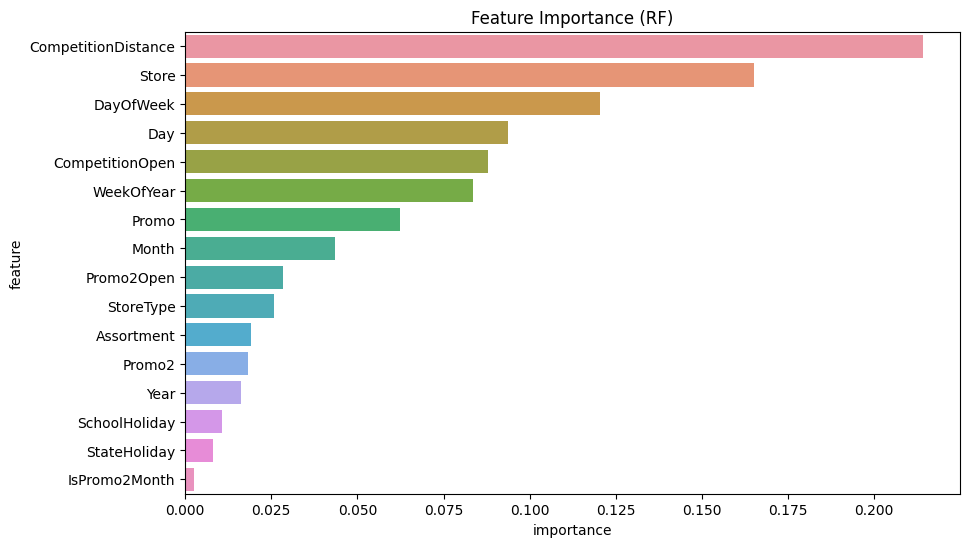

In [129]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance (RF)')
sn.barplot(data=feature_importance_df, x='importance', y='feature');
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Feature_importance_Plot_RF',dpi=100);

predict the sales for test file

In [130]:
ytest_final = Best_RF_R.predict(inputs_ts)
ytest_final.astype(int)

array([15988, 15019, 14515, ..., 14999, 20374, 16802])

In [131]:
df_test['Sales']  = ytest_final
pd.DataFrame(df_test).to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_test_with_Sales_RF.csv")

## 6 - DecisionTree

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [134]:
# define the grid search parameters
max_features = [1, 5, 10]
max_depth = [2, 7, 10]
min_samples_split = [2, 5, 7]

param_grid = dict(
                  max_features = max_features,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split
                  )

## 6-1 GridSearchCV

In [135]:
%%time
DT_R = DecisionTreeRegressor()

# Run Grid Search
grid_search_DT_R = GridSearchCV(DT_R, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

Grid_Results = grid_search_DT_R.fit(xtrain,ytrain)

# Get Best Parameters of the Model
Best_Params = Grid_Results.best_params_
Best_Params

CPU times: user 211 ms, sys: 35.1 ms, total: 246 ms
Wall time: 2.28 s


{'max_depth': 10, 'max_features': 10, 'min_samples_split': 2}

In [136]:
# Construct Main ML Model based on obtained Best Parameters
Best_DT_R = DecisionTreeRegressor(
                                  splitter = "best",
                                  max_features = Best_Params["max_features"],
                                  max_depth = Best_Params["max_depth"],
                                  min_samples_split = Best_Params["min_samples_split"],
                                  )

## 6-2 Train Decision Tree Model and Apply KFold Cross Validation

In [137]:
%%time
RMSE_TR = []
RMSE_TS = []
DecisionTree = []

for train_index, test_index in kf.split(xtrain):
    i = 0
    
    X_tr, X_ts = xtrain.iloc[train_index,:], xtrain.iloc[test_index,:]
    y_tr, y_ts = ytrain.iloc[train_index], ytrain.iloc[test_index]  
    
    Best_DT_R.fit(X_tr, y_tr)
    
    y_tr_prd = Best_DT_R.predict(X_tr)
    y_ts_prd = Best_DT_R.predict(X_ts)
       
    RMSE_tr   = np.sqrt(metrics.mean_squared_error(y_tr, y_tr_prd))
    RMSE_ts   = np.sqrt(metrics.mean_squared_error(y_ts, y_ts_prd))
    
    i += 1
    
    RMSE_TR.append(RMSE_tr)
    RMSE_TS.append(RMSE_ts)
    DecisionTree.append(Best_DT_R)

CPU times: user 228 ms, sys: 1.93 ms, total: 230 ms
Wall time: 229 ms


In [138]:
RMSE_TR

[2070.574448397332,
 1903.384187047614,
 1891.5852085809747,
 2170.6950055173493,
 1883.7542390330354]

In [139]:
RMSE_TS

[2128.8196277123448,
 2263.950076932955,
 2223.9867009664385,
 2379.1290444471506,
 2117.685988482002]

In [140]:
Idx = RMSE_TS.index(min(RMSE_TS))
Idx

4

In [141]:
DecisionTree_Model = DecisionTree[Idx]
DecisionTree_Model

DecisionTreeRegressor(max_depth=10, max_features=10)

## 6-3 Train Results

In [142]:
ytrain_prd = DecisionTree_Model.predict(xtrain)

In [143]:
df_Train = pd.DataFrame({'Actual_Train': ytrain, 'Predicted_Train': ytrain_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Train_Targets_Outputs_Results_DT.xlsx')
df_Train.to_excel(writer, sheet_name='Train_Results')
writer.save()
df_Train

Actual_Train  Predicted_Train
467            17267     19161.666667
1143           15658     17112.465517
1147           16225     17461.528090
1227           13817     15440.546995
1240           14984     15440.546995
...              ...              ...
816892         17019     15669.700000
816902         14089     13961.333333
816917         14220     15480.156997
816935         18470     18703.789474
816945         17257     17656.666667

[24615 rows x 2 columns]

In [144]:
################################### Calculate Train Results ###################################
R2_train   = np.round(metrics.r2_score(ytrain, ytrain_prd),2)
RMSE_train = np.round(np.sqrt(metrics.mean_squared_error(ytrain, ytrain_prd)),2)
MAPE_train = np.round(metrics.mean_absolute_percentage_error(ytrain, ytrain_prd),2)
MAE_train  = np.round(metrics.mean_absolute_error(ytrain, ytrain_prd),2)

##################################### Print Train Results #####################################
print("\n"+"*"*25+" Train Results DT "+"*"*25)
print(f"R2_Train = {R2_train}")
print(f"RMSE_Train = {RMSE_train}")
print(f"MAPE_Train = {MAPE_train}")
print(f"MAE_Train = {MAE_train}")

############################## Export Train Results to Text File ##############################
print("*"*25+" Train Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results DT.txt', 'w'))
print(f"R2_Train   = {R2_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results DT.txt', 'a'))
print(f"RMSE_Train = {RMSE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results DT.txt', 'a'))
print(f"MAPE_Train = {MAPE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results DT.txt', 'a'))
print(f"MAE_Train  = {MAE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results DT.txt', 'a'))


************************* Train Results DT *************************
R2_Train = 0.61
RMSE_Train = 1932.81
MAPE_Train = 0.08
MAE_Train = 1354.73


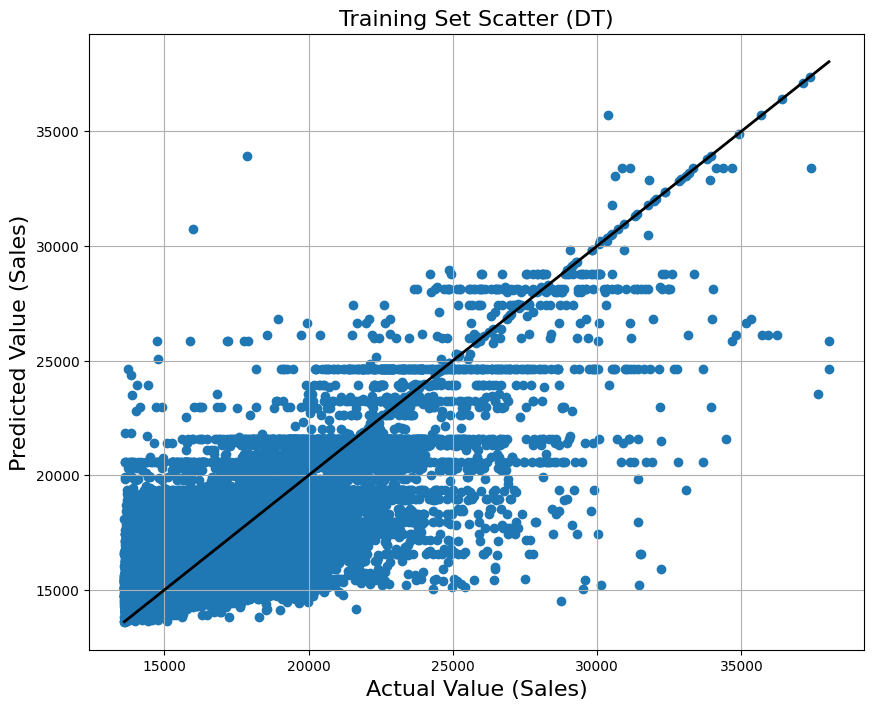

In [145]:
##################################### Train Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytrain, ytrain_prd)
MIN = min(float(ytrain.min()),float(ytrain_prd.min()))
MAX = max(float(ytrain.max()),float(ytrain_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Training Set Scatter (DT)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Scatter_DT',dpi=100);

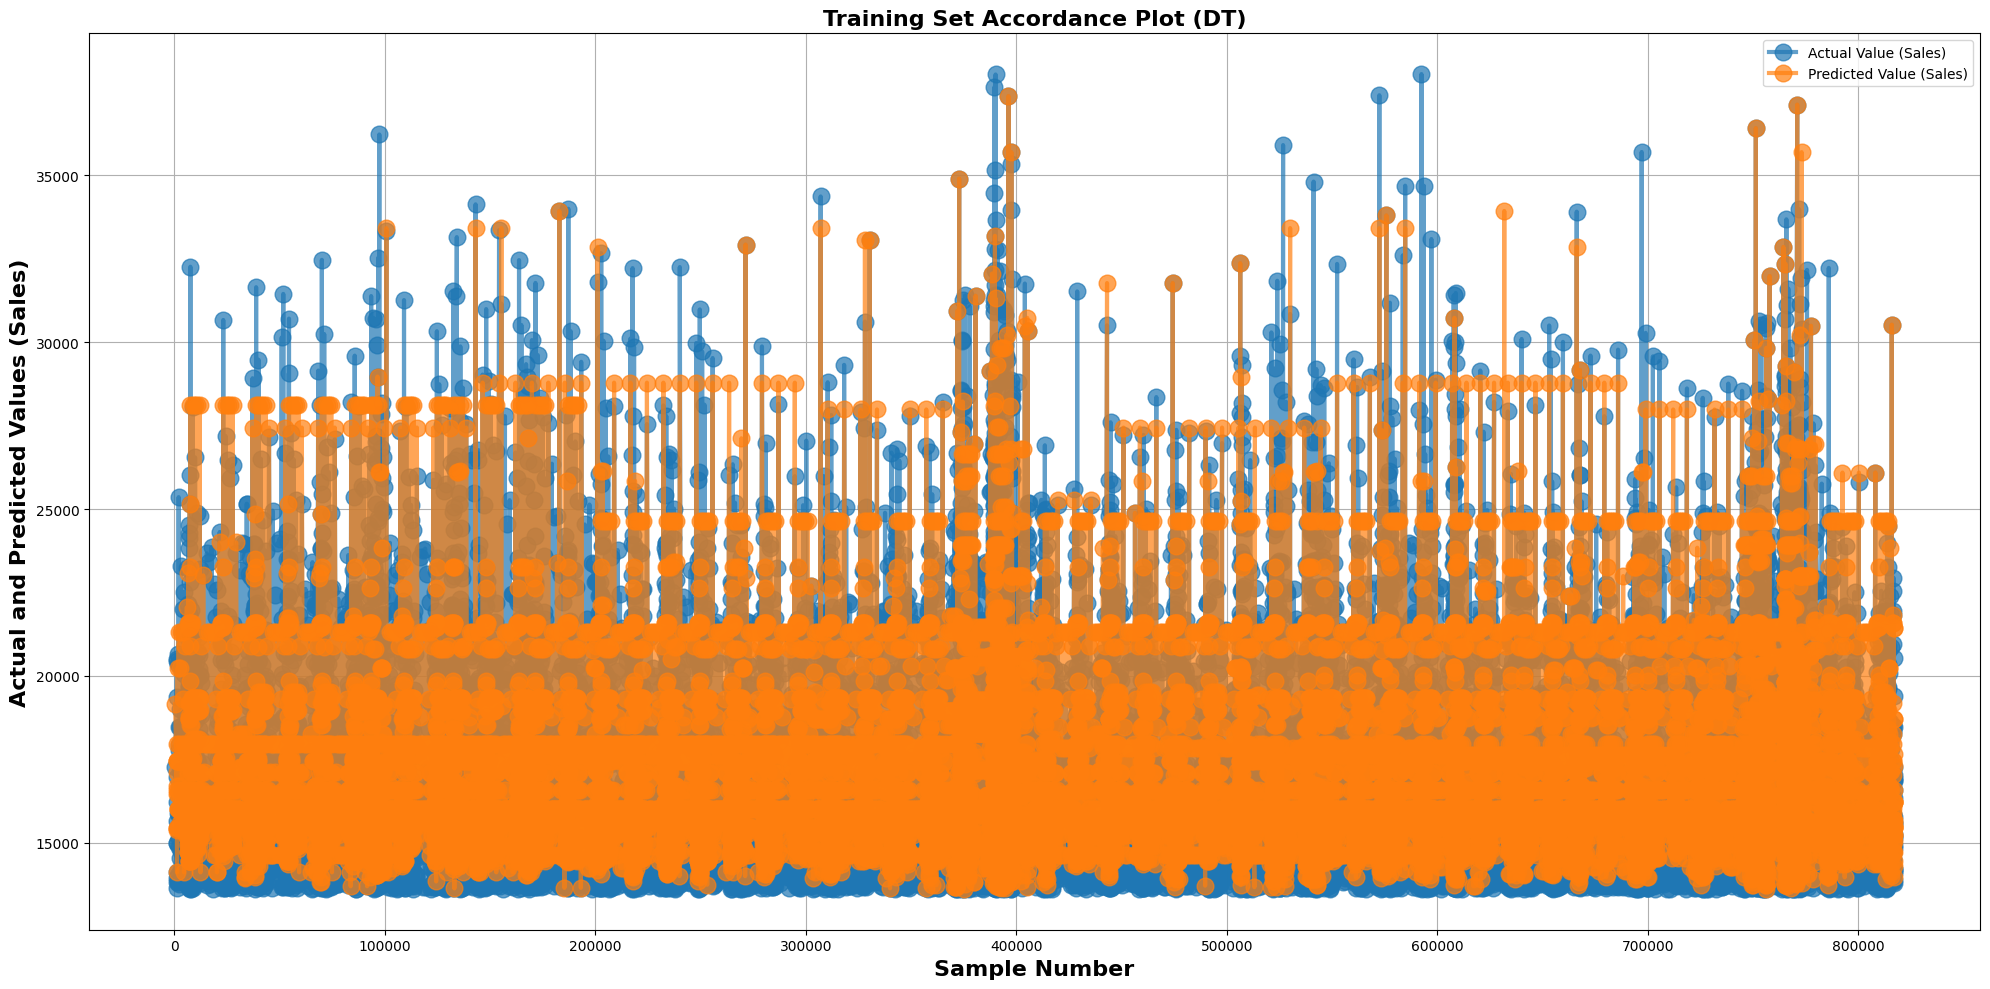

In [146]:
##################################### Train Accordance Plot #####################################
dfTR = df_Train
plt.figure(figsize=(20,10))
plt.plot(dfTR['Actual_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTR['Predicted_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Training Set Accordance Plot (DT)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Accordance_Plot_DT',dpi=100);
plt.show();

## 6-4 Test Results

In [147]:
ytest_prd = DecisionTree_Model.predict(xtest)

In [148]:
df_Test = pd.DataFrame({'Actual_Test': ytest, 'Predicted_Test': ytest_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Test_Targets_Outputs_Results_DT.xlsx')
df_Test.to_excel(writer, sheet_name='Test_Results')
writer.save()
df_Test

Actual_Test  Predicted_Test
816968         14352    15205.500000
816970         14622    16569.246753
816977         21338    21476.159664
816978         19110    19625.000000
816985         25589    21579.347518
...              ...             ...
1017142        14730    15619.979167
1017145        13962    14910.558442
1017172        13989    13924.176471
1017185        25280    15325.081633
1017199        16625    15601.657143

[6154 rows x 2 columns]

In [149]:
################################### Calculate Test Results ###################################
R2_test   = np.round(metrics.r2_score(ytest, ytest_prd),2)
RMSE_test = np.round(np.sqrt(metrics.mean_squared_error(ytest, ytest_prd)),2)
MAPE_test = np.round(metrics.mean_absolute_percentage_error(ytest, ytest_prd),2)
MAE_test  = np.round(metrics.mean_absolute_error(ytest, ytest_prd),2)

##################################### Print Test Results #####################################
print("\n"+"*"*25+" Test Results DT "+"*"*25)
print(f"R2_Test   = {R2_test}")
print(f"RMSE_Test = {RMSE_test}")
print(f"MAPE_Test = {MAPE_test}")
print(f"MAE_Test  = {MAE_test}")

############################## Export Test Results to Text File ##############################
print("*"*25+" Test Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results DT.txt', 'w'))
print(f"R2_Test   = {R2_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results DT.txt', 'a'))
print(f"RMSE_Test = {RMSE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results DT.txt', 'a'))
print(f"MAPE_Test = {MAPE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results DT.txt', 'a'))
print(f"MAE_Test  = {MAE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results DT.txt', 'a'))


************************* Test Results DT *************************
R2_Test   = 0.34
RMSE_Test = 2450.5
MAPE_Test = 0.09
MAE_Test  = 1640.66


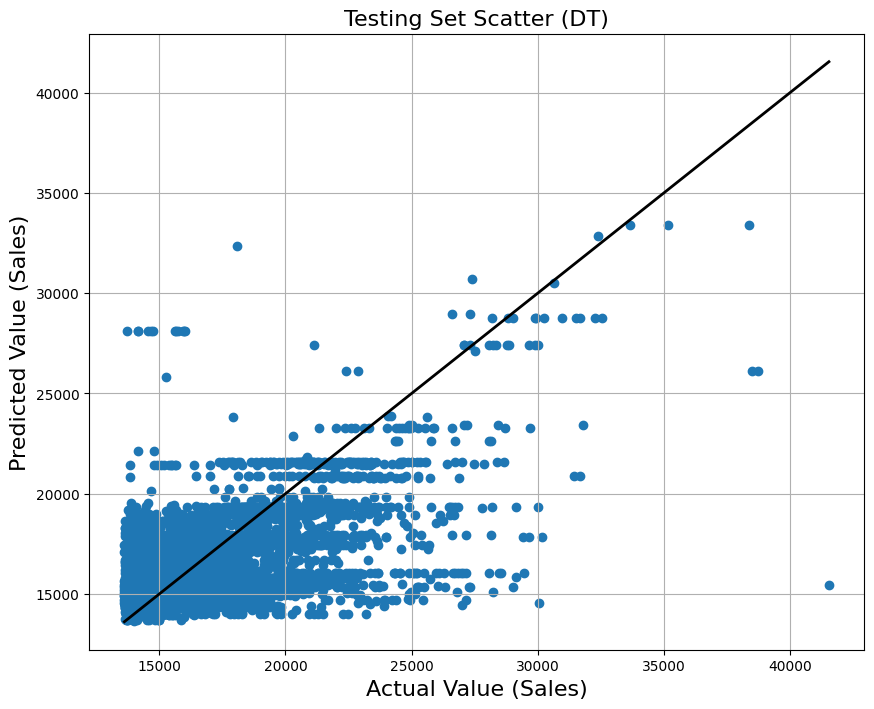

In [150]:
##################################### Test Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytest, ytest_prd)
MIN = min(float(ytest.min()),float(ytest_prd.min()))
MAX = max(float(ytest.max()),float(ytest_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Testing Set Scatter (DT)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Scatter_DT',dpi=100);

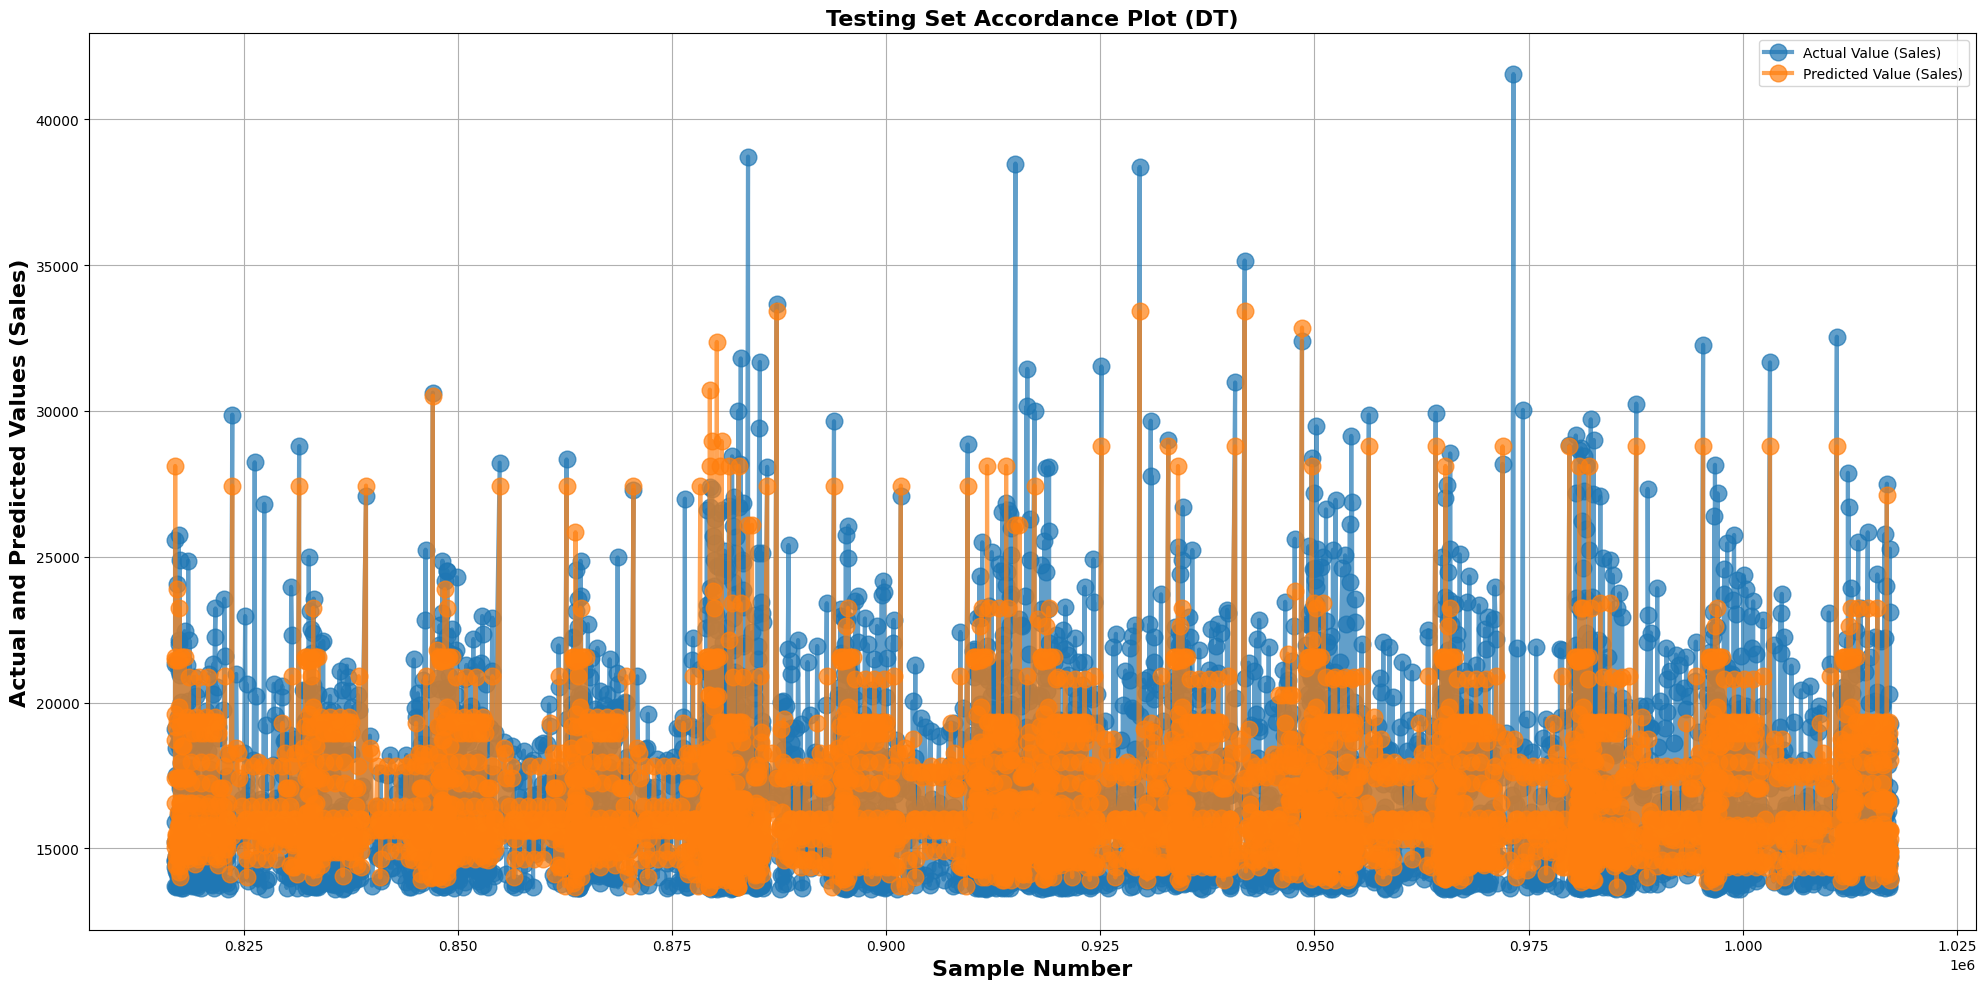

In [151]:
##################################### Test Accordance Plot #####################################
dfTS = df_Test
plt.figure(figsize=(20,10))
plt.plot(dfTS['Actual_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTS['Predicted_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Testing Set Accordance Plot (DT)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Accordance_Plot_DT',dpi=100);
plt.show();

In [152]:
k = 2
result_array[k,1] = R2_train
result_array[k,2] = RMSE_train
result_array[k,3] = MAPE_train
result_array[k,4] = MAE_train
result_array[k,5] = R2_test
result_array[k,6] = RMSE_test
result_array[k,7] = MAPE_test
result_array[k,7] = MAE_test

Feature importance

In [153]:
feature_importance_df = pd.DataFrame({
                                    'feature': xtrain.columns,
                                    'importance': Best_DT_R.feature_importances_
}).sort_values('importance', ascending=False)

In [154]:
feature_importance_df
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/feature_importance_DT.csv")

feature  importance
7   CompetitionDistance    0.365031
0                 Store    0.140795
1             DayOfWeek    0.095444
8       CompetitionOpen    0.077764
2                 Promo    0.077731
12           WeekOfYear    0.061299
9                   Day    0.038306
5             StoreType    0.034804
13               Promo2    0.034781
10                Month    0.024162
14           Promo2Open    0.020491
6            Assortment    0.016014
3          StateHoliday    0.006685
4         SchoolHoliday    0.003480
11                 Year    0.002991
15        IsPromo2Month    0.000221

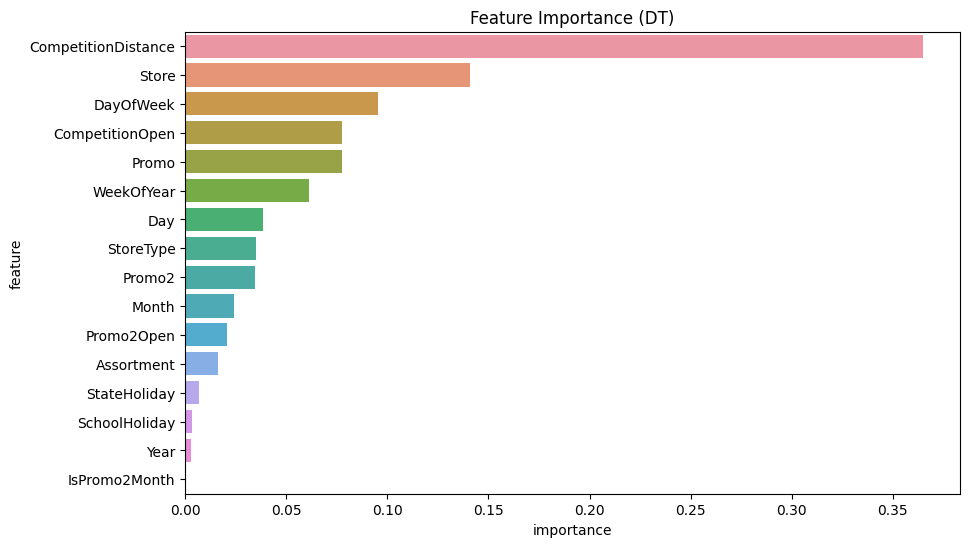

In [155]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance (DT)')
sn.barplot(data=feature_importance_df, x='importance', y='feature');
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Feature_importance_Plot_DT',dpi=100);

predict the sales for test file

In [156]:
ytest_final = Best_DT_R.predict(inputs_ts)
ytest_final.astype(int)

array([15085, 20809, 14910, ..., 15344, 20907, 14282])

In [157]:
df_test['Sales'] = ytest_final
pd.DataFrame(df_test).to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_test_with_Sales_DT.csv")

## 7 - Linear Regression

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [160]:
lm = LinearRegression()

## 7-1 Train Linear Regression Model and Apply KFold Cross Validation

In [161]:
%%time
RMSE_TR = []
RMSE_TS = []
LinearRegression = []

for train_index, test_index in kf.split(xtrain):
    i = 0
    
    X_tr, X_ts = xtrain.iloc[train_index,:], xtrain.iloc[test_index,:]
    y_tr, y_ts = ytrain.iloc[train_index], ytrain.iloc[test_index]  
    
    lm.fit(X_tr, y_tr)
    
    y_tr_prd = lm.predict(X_tr)
    y_ts_prd = lm.predict(X_ts)
       
    RMSE_tr   = np.sqrt(metrics.mean_squared_error(y_tr, y_tr_prd))
    RMSE_ts   = np.sqrt(metrics.mean_squared_error(y_ts, y_ts_prd))
    
    i += 1
    
    RMSE_TR.append(RMSE_tr)
    RMSE_TS.append(RMSE_ts)
    LinearRegression.append(lm)

CPU times: user 121 ms, sys: 84.2 ms, total: 206 ms
Wall time: 172 ms


In [162]:
RMSE_TR

[3047.877641166103,
 2996.8822251127067,
 3014.2925124206163,
 3021.1711265009035,
 3027.954741142891]

In [163]:
RMSE_TS

[2917.894942471001,
 3122.6800997882333,
 3053.7431433072124,
 3026.806542263422,
 2999.2767610476362]

In [164]:
Idx = RMSE_TS.index(min(RMSE_TS))
Idx

0

In [165]:
LinearRegression_Model = LinearRegression[Idx]
LinearRegression_Model

LinearRegression()

In [166]:
#For retrieving the slope:
print(LinearRegression_Model.coef_)

[ 2.32909794e-01 -2.87554329e+01  2.05053648e+02  1.99938692e+03
 -4.78474927e+01 -2.28817503e+02  1.88996173e+01 -4.77116614e-02
 -4.07029104e+00  3.83757204e+00  6.54721456e+01 -1.43637831e+02
 -3.13907114e+00 -1.21640574e+03  1.11855551e+01 -1.29524104e+02]


In [167]:
coefficients = pd.concat([pd.DataFrame(xtrain.columns),pd.DataFrame(np.transpose(LinearRegression_Model.coef_))], axis = 1)
coefficients.columns=['variable', 'coef']
coefficients

variable         coef
0                 Store     0.232910
1             DayOfWeek   -28.755433
2                 Promo   205.053648
3          StateHoliday  1999.386917
4         SchoolHoliday   -47.847493
5             StoreType  -228.817503
6            Assortment    18.899617
7   CompetitionDistance    -0.047712
8       CompetitionOpen    -4.070291
9                   Day     3.837572
10                Month    65.472146
11                 Year  -143.637831
12           WeekOfYear    -3.139071
13               Promo2 -1216.405737
14           Promo2Open    11.185555
15        IsPromo2Month  -129.524104

In [168]:
_.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/LinearRegression_Variables_Coefficients.csv")

In [169]:
#To retrieve the intercept:
print(LinearRegression_Model.intercept_)

306155.1321317986


## 7-2 Train Results

In [170]:
ytrain_prd = LinearRegression_Model.predict(xtrain)

In [171]:
df_Train = pd.DataFrame({'Actual_Train': ytrain, 'Predicted_Train': ytrain_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Train_Targets_Outputs_Results_LR.xlsx')
df_Train.to_excel(writer, sheet_name='Train_Results')
writer.save()
df_Train

Actual_Train  Predicted_Train
467            17267     18748.283284
1143           15658     15713.299267
1147           16225     17058.378008
1227           13817     17017.265879
1240           14984     17034.103159
...              ...              ...
816892         17019     14514.033852
816902         14089     16333.007896
816917         14220     16287.948508
816935         18470     16180.534961
816945         17257     16640.424351

[24615 rows x 2 columns]

In [172]:
################################### Calculate Train Results ###################################
R2_train   = np.round(metrics.r2_score(ytrain, ytrain_prd),2)
RMSE_train = np.round(np.sqrt(metrics.mean_squared_error(ytrain, ytrain_prd)),2)
MAPE_train = np.round(metrics.mean_absolute_percentage_error(ytrain, ytrain_prd),2)
MAE_train  = np.round(metrics.mean_absolute_error(ytrain, ytrain_prd),2)

##################################### Print Train Results #####################################
print("\n"+"*"*25+" Train Results LR "+"*"*25)
print(f"R2_Train = {R2_train}")
print(f"RMSE_Train = {RMSE_train}")
print(f"MAPE_Train = {MAPE_train}")
print(f"MAE_Train = {MAE_train}")

############################## Export Train Results to Text File ##############################
print("*"*25+" Train Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results LR.txt', 'w'))
print(f"R2_Train   = {R2_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results LR.txt', 'a'))
print(f"RMSE_Train = {RMSE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results LR.txt', 'a'))
print(f"MAPE_Train = {MAPE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results LR.txt', 'a'))
print(f"MAE_Train  = {MAE_train}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Train Results LR.txt', 'a'))


************************* Train Results LR *************************
R2_Train = 0.05
RMSE_Train = 3022.24
MAPE_Train = 0.13
MAE_Train = 2246.37


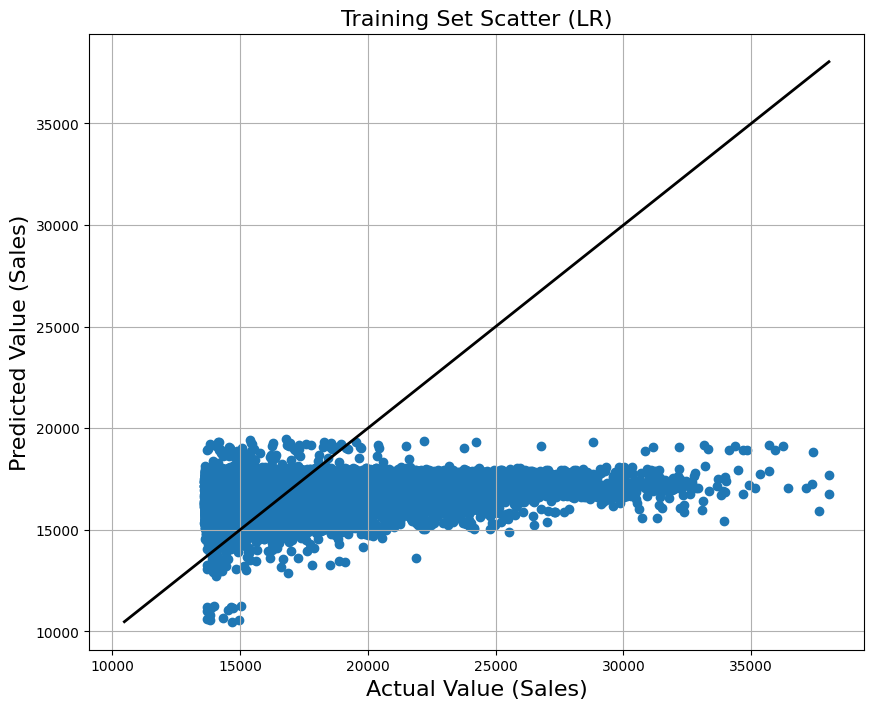

In [173]:
##################################### Train Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytrain, ytrain_prd)
MIN = min(float(ytrain.min()),float(ytrain_prd.min()))
MAX = max(float(ytrain.max()),float(ytrain_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Training Set Scatter (LR)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Scatter_LR',dpi=100);

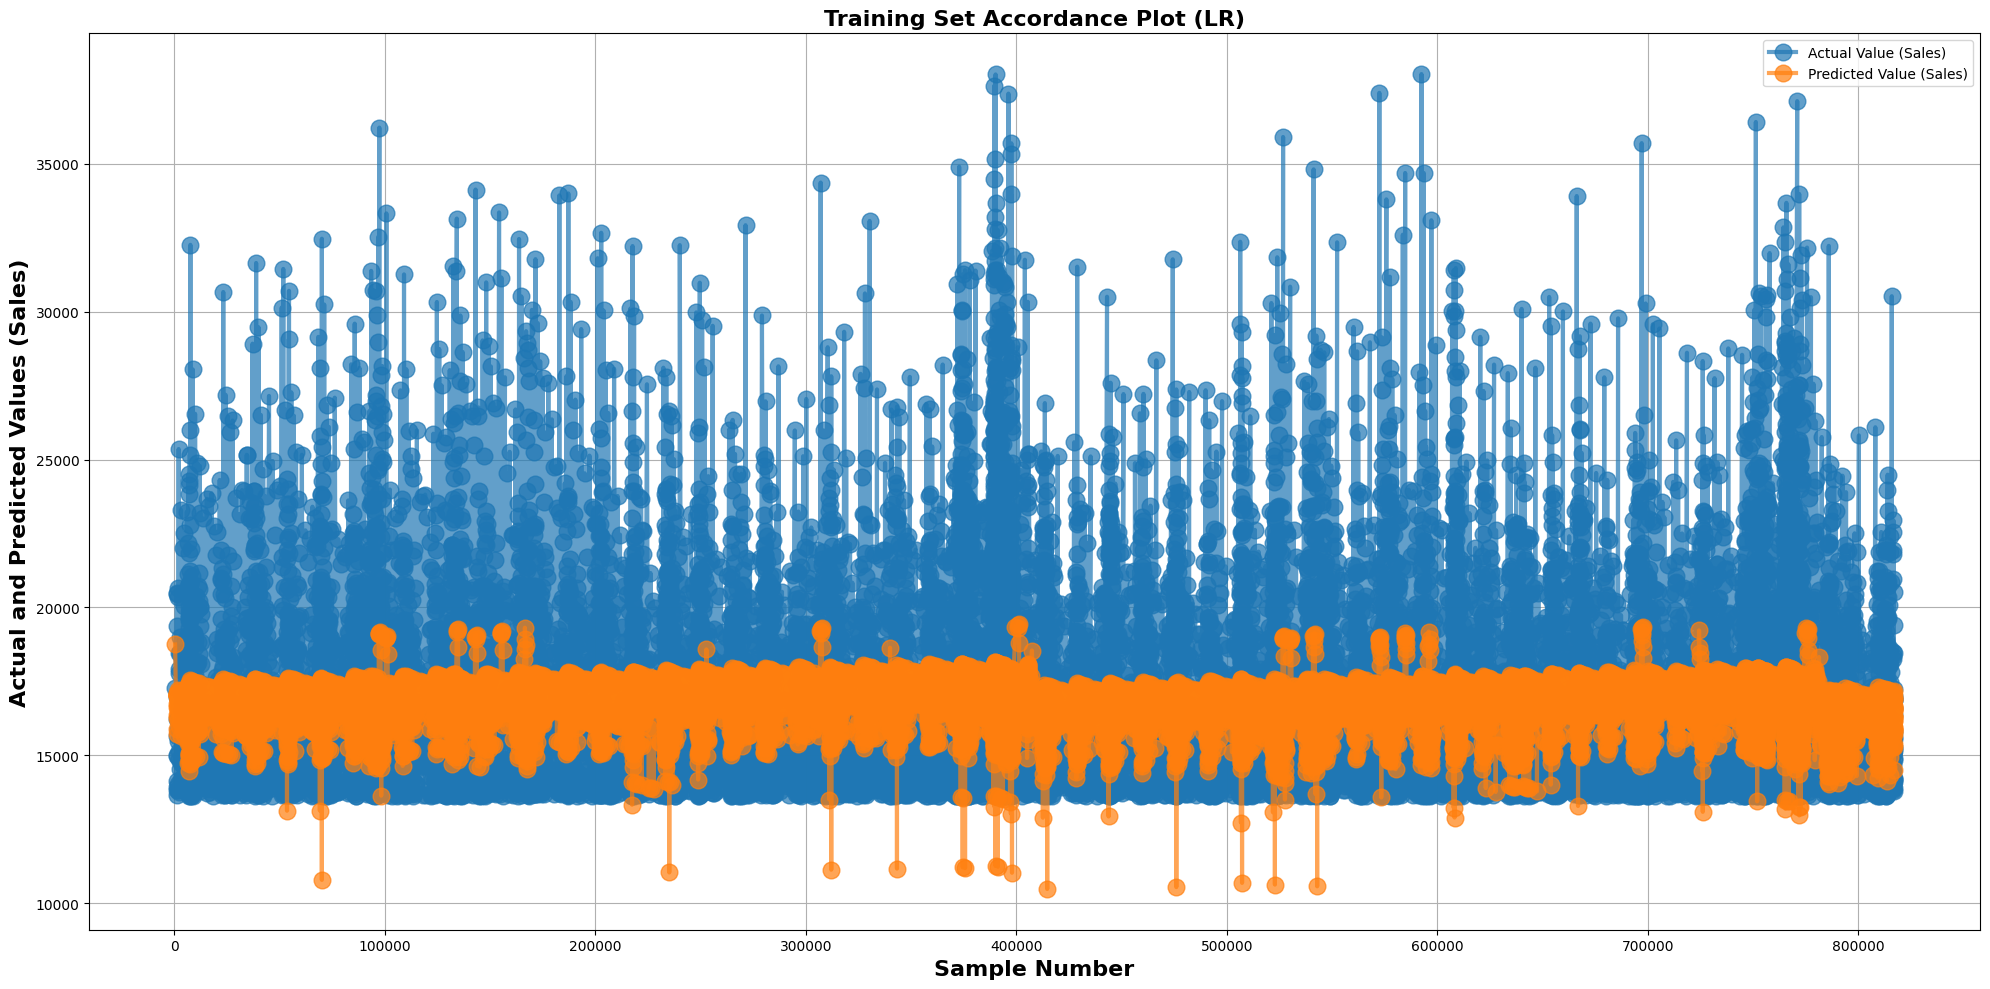

In [174]:
##################################### Train Accordance Plot #####################################
dfTR = df_Train
plt.figure(figsize=(20,10))
plt.plot(dfTR['Actual_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTR['Predicted_Train'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Training Set Accordance Plot (LR)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Training_Set_Accordance_Plot_LR',dpi=100);
plt.show();

## 7-3 Test Results

In [175]:
ytest_prd = LinearRegression_Model.predict(xtest)

In [176]:
df_Test = pd.DataFrame({'Actual_Test': ytest, 'Predicted_Test': ytest_prd})
writer = pd.ExcelWriter('drive/MyDrive/Store_Sales_Predictions_Results/Test_Targets_Outputs_Results_LR.xlsx')
df_Test.to_excel(writer, sheet_name='Test_Results')
writer.save()
df_Test

Actual_Test  Predicted_Test
816968         14352    16364.029691
816970         14622    17118.575807
816977         21338    16711.415529
816978         19110    15157.615748
816985         25589    17101.024166
...              ...             ...
1017142        14730    16340.351341
1017145        13962    14835.634987
1017172        13989    16061.306180
1017185        25280    16597.656524
1017199        16625    16368.778810

[6154 rows x 2 columns]

In [177]:
################################### Calculate Test Results ###################################
R2_test   = np.round(metrics.r2_score(ytest, ytest_prd),2)
RMSE_test = np.round(np.sqrt(metrics.mean_squared_error(ytest, ytest_prd)),2)
MAPE_test = np.round(metrics.mean_absolute_percentage_error(ytest, ytest_prd),2)
MAE_test  = np.round(metrics.mean_absolute_error(ytest, ytest_prd),2)

##################################### Print Test Results #####################################
print("\n"+"*"*25+" Test Results LR "+"*"*25)
print(f"R2_Test   = {R2_test}")
print(f"RMSE_Test = {RMSE_test}")
print(f"MAPE_Test = {MAPE_test}")
print(f"MAE_Test  = {MAE_test}")

############################## Export Test Results to Text File ##############################
print("*"*25+" Test Results "+"*"*25, file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results LR.txt', 'w'))
print(f"R2_Test   = {R2_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results LR.txt', 'a'))
print(f"RMSE_Test = {RMSE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results LR.txt', 'a'))
print(f"MAPE_Test = {MAPE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results LR.txt', 'a'))
print(f"MAE_Test  = {MAE_test}", file=open('drive/MyDrive/Store_Sales_Predictions_Results/Test Results LR.txt', 'a'))


************************* Test Results LR *************************
R2_Test   = 0.07
RMSE_Test = 2906.8
MAPE_Test = 0.12
MAE_Test  = 2102.19


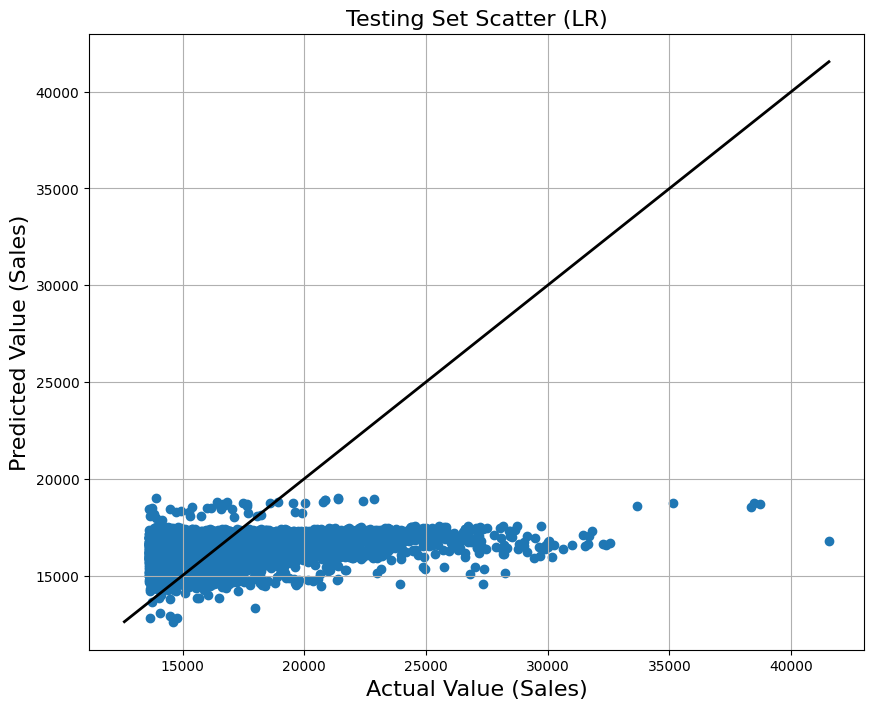

In [178]:
##################################### Test Scatter Plot #####################################
plt.figure(figsize=(10,8))
plt.scatter(ytest, ytest_prd)
MIN = min(float(ytest.min()),float(ytest_prd.min()))
MAX = max(float(ytest.max()),float(ytest_prd.max()))
plt.plot([MIN,MAX],[MIN,MAX],linewidth=2, markersize=12, color='black')
plt.title("Testing Set Scatter (LR)", fontsize=16)
plt.xlabel('Actual Value (Sales)', fontsize=16)
plt.ylabel('Predicted Value (Sales)', fontsize=16)
plt.grid(which='major', axis='both')
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Scatter_LR',dpi=100);

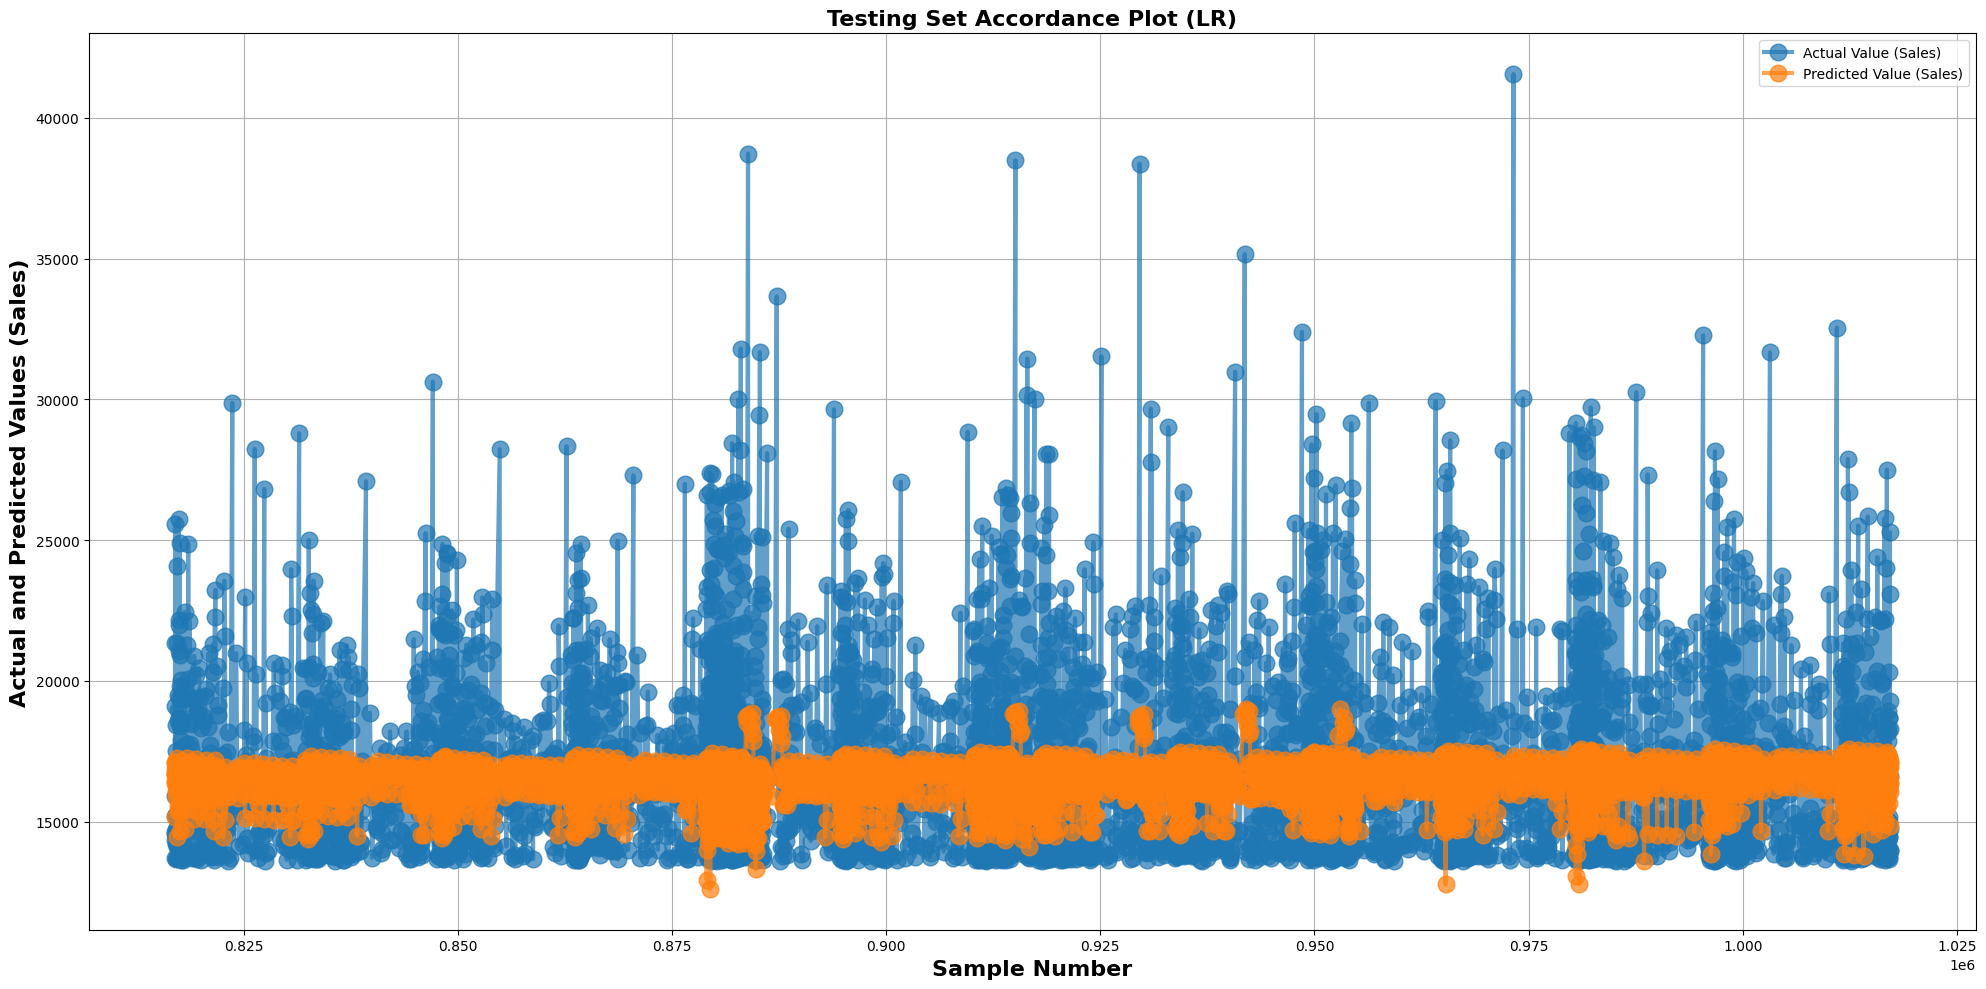

In [179]:
##################################### Test Accordance Plot #####################################
dfTS = df_Test
plt.figure(figsize=(20,10))
plt.plot(dfTS['Actual_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Actual Value (Sales)', alpha=0.7)
plt.plot(dfTS['Predicted_Test'].sort_index(), '-o', linewidth=3, markersize=12, label='Predicted Value (Sales)', alpha=0.7)
plt.grid(which='major', axis='both')
plt.title("Testing Set Accordance Plot (LR)", fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontsize=16, fontweight='bold')
plt.ylabel('Actual and Predicted Values (Sales)', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('drive/MyDrive/Store_Sales_Predictions_Results/Testing_Set_Accordance_Plot_LR',dpi=100);
plt.show();

In [180]:
k = 3
result_array[k,1] = R2_train
result_array[k,2] = RMSE_train
result_array[k,3] = MAPE_train
result_array[k,4] = MAE_train
result_array[k,5] = R2_test
result_array[k,6] = RMSE_test
result_array[k,7] = MAPE_test
result_array[k,7] = MAE_test

predict the sales for test file

In [181]:
ytest_final = LinearRegression_Model.predict(inputs_ts)
ytest_final.astype(int)

array([16490, 15631, 16126, ..., 16837, 17238, 15499])

In [182]:
df_test['Sales']  = ytest_final
pd.DataFrame(df_test).to_csv("drive/MyDrive/Store_Sales_Predictions_Results/df_test_with_Sales_LR.csv")

## 8 - All Results

In [183]:
res_metrics_all=pd.DataFrame(result_array, columns=columns_name)
res_metrics_all["Algorithm"]=Algorithm
res_metrics_all
res_metrics_all.to_csv("drive/MyDrive/Store_Sales_Predictions_Results/All_Algorithms_Results.csv")

Algorithm  Rsq_TR  RMSE_TR  MAPE_TR   MAE_TR  Rsq_TS  RMSE_TS  MAPE_TS  \
0       XGB    0.90   988.70     0.04   695.35    0.64  1813.55  1241.69   
1        RF    0.92   903.26     0.04   608.30    0.66  1763.21  1239.63   
2        DT    0.61  1932.81     0.08  1354.73    0.34  2450.50  1640.66   
3        LR    0.05  3022.24     0.13  2246.37    0.07  2906.80  2102.19   

   MAE_TS  
0     0.0  
1     0.0  
2     0.0  
3     0.0